# Decoding BlackJack

<h4>with python code</h4>

This notebook is for entertainment and understanding scientific concepts. The concepts and ideas are applied using python code. Laws, formulas and equations are broken down in easy to understand code and visualizations.

In this series of notebooks you will find the following titles:
* decoding the Soul with python code
* decoding Evolution with python code
* decoding Human Tribes with python code
* decoding the Universe with python code
* decoding the Stock Exchange with python code
* decoding Roulette with python code
* decoding BlackJack with python code, <i>card counting included</i>
* decoding <i>put your request in the comments</i>

The code will be pythonized and refactored in between and at the very end. E.g. for clarity purposes, FOR loops might be used where list comprehension is a better and faster solution. Also functions are created to show output, to follow the game and/or card counts, which will not be needed at a later stage.

If you have any suggestions, questions, and/or code improvements, please let me know in the comments. 

Enjoy.

## Introduction

Casino's, lotteries, betting shops, online gambling sites, gambling apps, slots aka "one armed bandits", bingo's, people just love to give their money away. This notebook shows you how and why it's impossible to win, or is it?! Several betting strategies are shown and tested as well how "the house always wins" by using counter measures to them.

## 1. The Rules of Black Jack or 21

Let's start with a short explanation of card game basics and the rules of the game Black Jack.

<h5>A few basics about a deck of cards</h5> 

* A deck of cards has 52 cards. 
* There are 4 suits, which are Clubs, Diamonds, Hearts and Spades. 
* There are 13 cards for each suit 
* The cards are 2, 3, 4, 5, 6, 7, 8, 9, 10, J (Jack), Q (Queen), K (King) and A (Ace)
* In BlackJack the number cards have their own values from 2 to 10 
* In BlackJack the face cards like the J, Q, K are 10 points
* In BlackJack the Ace is 1 or 11 points, player's choice.

Rules of the game BlackJack are taken from: https://www.mastersofgames.com/rules/blackjack-rules.htm

<h5>Aim</h5> 

The aim of blackjack is to finish the game with a higher total than that of the dealer, without exceeding 21. Going over 21 is commonly known as ‘busting’ and means an automatic loss.

<h5>The Play - Basic Rules</h5> 

Blackjack is usually played at a table of 2-7 players and uses one to eight 52-card decks. All number cards (2-10) score the value indicated on them. The face cards (Jack, Queen, King) score 10 points and Ace can either be treated as 1 or 11.

At the beginning of each round, all players place their bets in their betting positions - also known as ‘boxes’. After the bets have been placed, all players are dealt two cards face-up in front of their respective betting positions. The dealer receives two cards, one face-up and another face-down.

Starting to the left of the dealer, each player is given a chance to draw more cards. The players can either ‘hit’ or ‘stand’. If the player calls out ‘HIT’, they are given an extra card. They can then either call out ‘HIT’ again, or ‘STAND’ if they do not wish to draw any more cards. The player can ‘HIT’ as many times as they wish, but have to aim not to ‘bust’ (exceed a total of 21).

If the player busts, they immediately lose their bet.

After each player has played and either stood or busted, the dealer takes their turn. They can, again, either ‘HIT’ or ‘STAND’. If the dealer’s hand exceeds 21, all players who didn't bust win immediately - their bet is returned along with a matching amount from the dealer's bank.

If the dealer reaches a valid hand, the cards are totalled and each player’s hand is compared to the dealer’s. If the player scored higher than the dealer, they win. If the player ties with the dealer, the original bet is returned to the player. Otherwise, the player loses their bet.

A perfect hand combines an ace with a 10, Jack, Queen or King and is known as a ‘Blackjack’.

<h5>Other Options that may be available during the hand</h5>


In addition to the basic rules, most casinos offer a few other options which are available to players in certain situations. It is always wise to consult the house rules to see the details of any allowed options.

<b>Split</b>

If the first two cards are a pair, the players are allowed to split those, thus creating two hands rather than the normal one per seat. To fund the split, the player has to place a second bet, of equal value to the first.

<b>Double Down</b>

After receiving the first two cards, players can double their bet while hitting. When doubling down, player receives one extra card only and cannot hit again. Most casinos allow cards to be split again if the second card makes another pair - but some have limits on the number of times a player can split.

<b>Insurance</b>

Insurance is a side bet, which is offered to the players when the dealer’s up card is an ace. It insures the player against the dealer having a ‘blackjack’ and gives them a chance to break even on the hand, if the dealer’s cards total 21.
Insurance is offered before the dealer checks their face-down card.

<b>Surrender</b>

If a player believes they will be unable to beat dealer’s hand, they can choose to ‘surrender’. In this strategy, players fold the hand, and risk loosing only half of the bet, rather than the whole amount.
A player can only forfeit their hand before receiving extra cards.


Let's code the basics, like shuffling cards with a number of decks which goes into the SHOE. The shoe is the thingy from which the dealer draws the cards at the table.

Anyways.

## 2. Shuffling Cards

We will use python standard functions for this, <code>itertools</code> to create the deck and <code>random</code> to shuffle the deck.

Let's create 2 decks and shuffle the cards.

In [ ]:
# Let's also import already a few basic libraries we will need along the way
import itertools, random

import math
from decimal import Decimal
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# playground to see how it is working, we take 2 decks
# we create tuples of cards, using itertools
number_of_decks = 2

# make a deck of cards, creating tuples with (deck number, card number, suit) using itertools.
deck = list(itertools.product(range(number_of_decks), range(1, 14), ['Spade', 'Heart', 'Diamond', 'Club']))
print("CREATED TUPLES OF CARDS")
print(deck)

# shuffles the deck
random.shuffle(deck)
print("SHUFFLED CARDS")
print(deck)

As you can see, the deck is created and we shuffled the deck...easy, right? Let's DRAW (display) a few cards from the deck.

In [ ]:
# draw a number of cards
# have a dict of named cards
cards = {11: "Jack", 12: "Queen", 13: "King", 1:"Ace"}

howmany = int(input('How many cards do you want to display? '))
print('You got:')
for i in range(howmany):
    deck_no, card, suit = deck[i] # unpack the tuple to have cleaner code
    print(f"{cards.get(card, card)} of {suit}") # use f-string together with get

Let's build our <code>create_deck</code> and <code>shuffle_deck</code> functions, which will result in the deck of cards to start with. It's generic, so you can use it for other games as well.

In [ ]:
# returns the stack of cards, from which the dealer will deal the hands
def create_deck(number_of_decks, deck_lowest_card, deck_highest_card, suits):
    deck = list(itertools.product(range(number_of_decks), 
                                  range(deck_lowest_card, deck_highest_card+1), # e.g. some games are 7, 8, ..., K, A
                                  suits))
    return deck

def shuffle_deck(deck):
    random.shuffle(deck)
    return deck

In [ ]:
number_of_decks = 2 # 2 decks of cards (104 cards) to start with
deck_lowest_card = 2 # starting with lowest value card, which is 2
deck_highest_card = 14 # assigning ace as 14. Take decisions like these when coding your own games
suits = ['Spades', 'Hearts', 'Diamonds', 'Clubs'] # changing suits into, cups, coins, swords, batons (Spanish/Italian) 
deck = create_deck(number_of_decks, deck_lowest_card, deck_highest_card, suits)
print(deck)

In [ ]:
shuffle_deck(deck)
print(deck)

## 3. Rules of Thumb for the player
The best way of playing BlackJack is based on well established rules of thumb. You can find the whole description on the following website: https://edge.twinspires.com/casino-news/10-blackjack-rules-of-thumb-with-reasons-for-each/

I summarized the play advice, it came from a casino and they know what's best for us (yeah right!). We will then code these rules for player's default behaviour and actions. Well, sort of, as I will use a 'standard' game card for this, but this gives you a rought idea in understandable language.
1. Double Down (double your bet) on a hand value of 10 or 11, Unless the Dealer Has a 10 or Ace. You get only 1 extra card.
2. The Dealer is Likely to Bust with a six or Lower, so STAND with 12 or higher
3. Betting Systems Rarely Work, following a betting strategy like the Martingale Strategy rarely ends well. ("no shit, Sherlock! See Decoding Roulette.")
4. Always STAND with Hard 17 or More, HIT with Hard 11 or Lower (Hard = not having an Ace making up the total)
5. STAND with Soft 19 or Higher, HIT Soft 17 or Lower (Soft = Ace is making up the score, e.g A + 6 = 17, HIT)
6. Don’t Take Insurance (We can safely ignore the insurance option, we won't take it)
7. Always Split Aces and 8s, but Never 4s, 5s, or 10s
8. For Other Pairs, Split Only if the Dealer Upcard is Lower than your card
9. Side Bets Are Fun, But Not Profitable. (We won't do them, not interesting for counting cards)
10. Don’t Chase Your Losses, don't increase bet after a loss. (We will use an intial bet, unless we are counting!)

We will implement the actions table found on: https://wizardofodds.com/games/blackjack/strategy/4-decks/

The table we implement is where the dealer stands on a SOFT 17 (Ace + 6), as adviced by this and other websites on the topic.

Now you have an idea of the game BlackJack, let's dive into it and build our game.

### Skeleton Game Loop

Let's start with the skeleton of the game loop. A game loop is fairly easy to understand:
* initiate the game's starting parameters, 
* start the game, using a game loop, e.g. <code>while</code> a condition is true, e.g. we reached our target (money won) or we are out of money. 
* The player(s) takes decisions and the dealer/casino reponds.
* finish game, when <code>while</code> conditions are no longer true
* submit game results for analysis, return objects and/or variables to simulation function

Skeleton code...

In [ ]:
def blackjack_game():
    # set initial game parameters
    print(f"0. set initial game parameters")
    print(f"START GAME LOOP")
    while True: # play on while game condition is true
        # deal cards
        print(f"1. dealing cards")
        
        # player decisions and hands
        print(f"2. player plays hand")
        
        # dealer's hand
        print(f"3. dealer plays hand")
        
        # settle player's money
        print(f"4. settle the bets")
        
        # keep score for analysis
        print(f"5. capture statistics")
        
        # set the table to play again
        print(f"6. set game parameters, and return to step 1.")
        
        break # break the loop as we haven't defined conditions yet
    print(f"END GAME LOOP")
    print(f"7. return game objects, variables to simulation function")
    return # game objects, variables

blackjack_game()

### The Player

Now this would be a good time to think about the data structures we want to use. To keep things simple, let's create a simple <code>class Player()</code>. 

We keep the information for each player as attributes: bankroll (funds), strategy, hands, initial_bet_amount, tracking splits or surrenders, etc. and implement any methods we might need.

I have constantly updated and extended the <code>class Player()</code> when it was needed, during writing the code for this article, so please don't be overwhelmed, just start and it will all fall into place. 

I will comment each attribute (variable), why we need it, also a bunch of methods are created, we might not need them all.

So without further ado...

In [ ]:
class Player():
    # if you put variables/attributes here, they are updated for every instance
    # we don't want that, so put them in the __init__ function instead. 
    # see python documentation

    # the class initial values, so player initial values
    def __init__(self, bankroll, initial_bet_amount, strategy, count_strategy, win_factor):
        # AMOUNTS AND BETS
        self.bankroll = bankroll # money player has during the game
        self.initial_bankroll = bankroll # money at start of the game
        self.initial_bet_amount =  initial_bet_amount # start bet amount
        self.win_factor = win_factor # factor to stop playing, e.g. 2 means after doubling the initial bankroll
        
        # HANDS AND STATUS OF HAND
        self.hands = [[]]  # SPLIT (2,2): [[(0, 2, 'Hearts'), (0, 8, 'Spades')], [(1, 2, 'Clubs'), (0, 11, 'Spades') ]]
        self.hand_values = [] # Track hand value, [10, 12] for above example, 11=JACK, which value is 10
        self.hand_bet_amounts = [initial_bet_amount] # Track bet amounts [200, 200] if initial bet was 200 before split
        self.split = False # Track if hand is SPLIT - True
        self.surrender = [False] # Track SURRENDER, depending on rules, surrender one hand after split, playing the other.
        
        # PLAYER STATISTICS
        self.play = True # player is playing, not ran out of money or other game reasons we might devise
        self.game_results = [] # store result of each game in the simulation tuple: (amount, hands_played)
        # ... anything you want to track about the player
        
        # STRATEGY AND CARD COUNTING
        # strategy: is affecting the way you play your hand, SPLIT, HIT, STAND, SURRENDER, INSURRANCE, etc.
        self.strategy = strategy # player's basic strategy of playing blackjack
        
        # count_strategy: is affecting (changing) the INITIAL AMOUNT you BET. A higher/lower amount depending on count
        self.count_strategy = count_strategy # Card counting strategy (methodology)
        self.running_count = 0 # current count, more about that later
        self.true_count = 0 # current count divided by the number of decks still in the shoe, more about that later
    
    def get_running_count(self):
        return self.running_count
    
    def get_true_count(self):
        return self.true_count
    
    def set_game_results(self, amount, hands_played):
        self.game_results.append((amount, hands_played))
    
    def get_game_amounts(self):
        game_amounts = [game_result[0] for game_result in self.game_results]
        return game_amounts
    
    def get_game_hands_played(self):
        hands_played = [game_result[1] for game_result in self.game_results]
        return hands_played
    
    def add_card_to_hand(self, idx, card):
        self.hands[idx].append(card) # appending a hand list in the list of hands.
        
    def get_hand(self, idx):
        return self.hands[idx]
    
    def set_hand_value(self, idx, value):
        if (len(self.hand_values)-1) >= idx:
            self.hand_values[idx] = value
        else:
            self.hand_values.append(value)
            
    def get_bankroll(self):
        return self.bankroll  
    
    def set_bankroll(self, bankroll):
        self.bankroll = bankroll
    
    def get_initial_bankroll(self):
        return self.initial_bankroll
    
    def get_win_factor(self):
        return self.win_factor
    
    def get_initial_bet_amount(self):
        return self.initial_bet_amount
    
    def set_initial_bet_amount(self, initial_bet_amount):
        self.initial_bet_amount = initial_bet_amount
        
    def get_strategy(self):
        return self.strategy

    def set_hands(self, hands):
        self.hands = hands
      
    def get_hands(self):
        return self.hands
        
    def get_hand_values(self):
        return self.hand_values
    
    def get_hand_value(self, idx):
        return self.hand_values[idx]
        
    def set_hand_bet_amount(self, idx, amount):
        if (len(self.hand_bet_amounts)-1) >= idx:
            self.hand_bet_amounts[idx] = amount
        else:
            self.hand_bet_amounts.append(amount)
    
    def get_hand_bet_amounts(self):
        return self.hand_bet_amounts
    
    def get_hand_bet_amount(self, idx):
        return self.hand_bet_amounts[idx]     
        
    def set_split(self, split):
        self.split = split
    
    def get_split(self):
        return self.split
    
    def set_surrender(self, idx, surrender):
        if (len(self.surrender)-1) >= idx:
            self.surrender[idx] = surrender
        else:
            self.surrender.append(surrender)
        return
    
    def get_play(self):
        return self.play
    
    def set_play(self, play):
        self.play = play
        
    def reset_card_counters(self):
        self.running_count = 0
        self.true_count = 0
        
    def update_stats():
        return
    
    def reset_hands(self): # reset hand after a play
        self.hands = [[]]
        self.hand_values = []
        self.hand_bet_amounts = [self.initial_bet_amount]
        self.split = False
        self.surrender = [False]
        return
        
    def show_hand(self): # hand info for debug purposes
        print(f"PLAYER'S HAND")
        print(f"Player's hand's cards: {self.hands}")
        print(f"Player's hand's values: {self.hand_values}")
        print(f"Player's hand's bet: {self.hand_bet_amounts}")
        print(f"Player's hand was split? {self.split}")
        return

Well, let's have a function that creates a list of players and put them in their 'seats' at the BlackJack table. A player will come with some cash, an initial idea what to bet, a basic play strategy and later a count/bet strategy.

In [ ]:
def create_players(number_of_players, bankroll, initial_bet_amount, strategy, count_strategy, win_factor):
    seats = [Player(bankroll, initial_bet_amount, strategy, count_strategy, win_factor) 
             for i in range(number_of_players)]
    return seats

Let's create two identical players who are playing at our blackjack table.

In [ ]:
number_of_players = 2
seats = create_players(number_of_players, 0, 0, '', '', 0)
for seat in seats:
    seat.show_hand()
seats

As you can see, the initial values are empty. Also, notice that the list of <code>seats</code> has two memory references...the two player instances of the class.

Anyways, let's not bother too much with details around classes and continue with our quest to make money in the Casino.

## 4. Let's deal and play.

<h5>Rules for dealing cards in BlackJack</h5>
The cards are dealt from the dealer's left to right (starting with the player to the far left.) Deal one up card to each player, followed by a down card to the dealer. Then deal a second up card to each player, followed by the dealer's up card. In a real game, make sure the cards are laid out diagonally so that both numbers on each card are visible.

<h5>Burning the first card each of the shoe</h5>
To prevent cheating with 'marked' cards, the dealer 'burns' the first card from the shoe. This card might be shown or not to the players. We will assume, we wouldn't know. But if we did, it goes to the 'running' count, when counting cards, more about that later.

For now, we will play stupidly and both players STAND and then compare with the dealers hand.

<h5>Rules for dealers play</h5>
The dealer will follow the following rigid rules:<br>
1. Hand value 16 and below, HIT (take a card)<br>
2. Hand value 17 (HARD/SOFT) and higher STAND (take no more cards) 

<h5>Rules for reshuffling the deck</h5>
We stop the game at the 'reshuffle' for now. The dealer inserted a plastic divider randomly in the middle section of the deck to designate a reshuffle. This is done to deter card counters.

To create the deck, we needed four variables: <code>number_of_decks</code>, <code>deck_lowest_card</code>, <code>deck_highest_card</code>, <code>suits</code> and we also need the number of players. For now, lets pass the <code>deck</code> and <code>number_of_players</code> to the <code>blackjack_game</code> function.

Note: I removed the game skeleton print statements, as we don't need them anymore.

In [ ]:
# Create the SHOE, from which the dealer takes the cards
# The Casino reshuffles about half way the deck, to deter card counters
def select_reshuffle_index(deck):
    # reshuffle is half way, so between 40 and 60 percent of deck we stick the reshuffle divider
    reshuffle_index = int(len(deck) * random.randint(40, 60) / 100)
    return reshuffle_index

# Create a new shoe to deal from
def get_new_shoe(deck):
    deck = shuffle_deck(deck)
    # Burn first card, index 0, start index 1...seriously, I think it's kind of stupid!!! Anyways.
    deck_index = 1
    reshuffle_index = select_reshuffle_index(deck)
    return deck, deck_index, reshuffle_index

# deal hands, players and dealer
def deal_first_round(dealer_hand, seats, deck, deck_index):
    # deal 2 cards each player and the dealer
    for _ in range(2):
        # deal cards to players in each seat
        for seat in seats:
            # check if player still playing, becomes important later
            if seat.get_play(): 
                idx = 0 # first hand only
                card = deck[deck_index] # player gets a card from the deck
                seat.add_card_to_hand(idx, card) # add card to hand player
                deck_index += 1 # point deck_index to next card in deck
        # deal cards to dealer    
        dealer_hand.append(deck[deck_index]) # add card to hand dealer
        deck_index += 1 # point deck_index to next card

    return dealer_hand, seats, deck_index

# Let's print the hands we have...
def print_initial_hands(seats, dealer_hand):
    for i, seat in enumerate(seats):
            print(f"PLAYER {i}")
            seat.show_hand()
            seat.reset_hands()
    print(f'DEALER hand is {dealer_hand}.')
    return

def blackjack_game(deck, seats):
    # set initial game parameters
    deck, deck_index, reshuffle_index = get_new_shoe(deck)
    dealer_hand = []
    
    ### START THE GAME ###
    # stop playing when we hit the reshuffle divider in the deck
    while reshuffle_index > deck_index: 
        # dealing initial cards
        dealer_hand, seats, deck_index = deal_first_round(dealer_hand, seats, deck, deck_index)
        print_initial_hands(seats, dealer_hand)
      
        # player decisions and hands    

        # complete dealer's hand        
        
        # settle player's money
        
        # keep score for analysis
        
        # set the table to play again
        
        # playing one round only
        break 
    return

In [ ]:
# Initial variables
number_of_players = 2
number_of_decks = 1
deck_lowest_card = 2
deck_highest_card = 14
suits = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
deck = create_deck(number_of_decks, deck_lowest_card, deck_highest_card, suits)
deck = shuffle_deck(deck)
seats = create_players(number_of_players, 0, 0, '', '', 0) 

In [ ]:
blackjack_game(deck, seats)

Nice, the basics seem to work. Let's do the rest. I will comment in the code what we are doing, including a little refactoring as well. Small steps, you should be able to follow.

In [ ]:
# Get card values to use to assess the hand
# Each index represent a card value index 2 = a 2 of suit, 3 = 3 of suit, etc.
# Note: index 0 and 1 are of no consequence for our game
# Face cards, index 11, 12 and 13 resp J, Q, K are 10 points
# An Ace is index 14 and 11 points
def get_card_value(card): 
    card_values = [0, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11]
    # simply use card as index of card_values to get the value
    card_value = card_values[card]
    return card_value

def calculate_hand_value(hand):
    hand_value = 0
    # hand value is the sum of the individual card values
    hand_value = sum([get_card_value(card[1]) for card in hand])
        
    # Check if Ace default value 11 takes hand over 21
    # If it does, extract 10 points, repeat if we are still above 22
    # in case we have multiple aces
    for card in hand:
        if (card[1] == 14) and (hand_value > 21):
            hand_value -= 10
    return hand_value

# Player decisions will be implemented later, 
# We already know it's based on the player's hand and the dealer's open card
# And we might STAND or HIT (draw cards), hence we need the seats, deck, deck_index and dealer open card
# We calculate hand value only for output (debug) purposes
def decision_players(seats, deck, deck_index, dealer_open_card):
    for seat in seats:
        if seat.get_play():
            # player info on hand
            idx = 0 # first hand only
            player_hand = seat.get_hand(idx)
            hand_value = calculate_hand_value(player_hand)
            seat.set_hand_value(idx, hand_value)       
    return seats, deck_index

# dealer DRAWS hand value up to 16 and STANDS on 17 or higher 
def decision_dealer(dealer_hand, deck, deck_index):
    hand_value = calculate_hand_value(dealer_hand)
    while hand_value < 17:
        dealer_hand.append(deck[deck_index])
        deck_index += 1
        hand_value = calculate_hand_value(dealer_hand)
    return dealer_hand, deck_index

# conviniently resetting hands each round
def reset_hands(dealer_hand, seats):
    dealer_hand = []
    for seat in seats:
        seat.reset_hands()
    return dealer_hand, seats

To follow the game and be able to debug any issues, let's print out the hands.

In [ ]:
# Divider to show start of new game, for clear output separation of each hand played
def print_new_game_divider(): 
    print('='*80)
    print('NEW HANDS')
    print('='*80)
    return

# Show output, for debugging and checking purposes
def get_hand_readable(hand):
    cards = {11: "Jack", 12: "Queen", 13: "King", 14:"Ace"}
    readable_hand = ""
    for card in hand:
        deck_no, card, suit = card # unpack the tuple to have cleaner code
        readable_hand += f"[{cards.get(card, card)} {suit}], " # use f-string together with get
    readable_hand = readable_hand[:-2]
    return readable_hand

# Show output, for debugging and checking purposes
# Adding SURRENDER to output
def print_blackjack(hand_value):
    if hand_value == 21:
        print(f" BLACKJACK")
    else:
        print()
    return

def show_dealer_player_hands(dealer_hand, seats): 
    for idx_seat, seat in enumerate(seats):
        surrender = seat.surrender
        for idx_hand, hand in enumerate(seat.hands):
            hand_value = calculate_hand_value(hand)
            readable_hand = get_hand_readable(hand)
            print(f"PLAYER {idx_seat} HAND: {readable_hand}, VALUE: {hand_value}", end='')
            if (hand[0][1]==14) or (hand[1][1]==14):
                print(f" - SOFT")
            else:
                print(f" - HARD")
            print(f"PLAYER {idx_seat} INITIAL BET: {seat.initial_bet_amount}, ", end='')
            print(f"FINAL BET: {seat.hand_bet_amounts[idx_hand]}, ", end='')
            print(f"FUNDS: {seat.bankroll}, SURRENDER: {seat.surrender[idx_hand]}")
            print(f"."*80)
    # Dealer hand progression
    hand_value = calculate_hand_value(dealer_hand[:2])
    readable_hand = get_hand_readable(dealer_hand[:2])
    print(f'DEALER START: {readable_hand}, VALUE: {hand_value}', end='')
    print_blackjack(hand_value)
    hand_value = calculate_hand_value(dealer_hand)
    readable_hand = get_hand_readable(dealer_hand)
    print(f'DEALER FINAL: {readable_hand}, VALUE: {hand_value}')
    return

Adding the functions created to the <code>blackjack_game</code> function and create an over arching simulation function <code>black_jack_sim</code>. We will deal with the simulation parameters later, for now we just set them in the simulation function.

In [ ]:
def blackjack_game(deck, seats):
    # set initial game parameters
    deck, deck_index, reshuffle_index = get_new_shoe(deck)
    dealer_hand = []
    # play until we hit the reshuffle divider, you need a stopping criteria for a game
    while reshuffle_index > deck_index:
        print_new_game_divider()
        # dealing initial cards   
        dealer_hand, seats, deck_index = deal_first_round(dealer_hand, seats, deck, deck_index)
           
        # player decisions and hands
        dealer_open_card = dealer_hand[0]
        seats, deck_index = decision_players(seats, deck, deck_index, dealer_open_card)
        
        # complete dealer's hand
        dealer_hand, deck_index = decision_dealer(dealer_hand, deck, deck_index)
        
        # settle player's money
        
        # keep score for analysis
        show_dealer_player_hands(dealer_hand, seats)
        
        # set the table to play again
        dealer_hand, seats = reset_hands(dealer_hand, seats)
      
    return

def black_jack_sim(number_of_games):
    # sim parameters
    number_of_decks = 8 # Casino's use 4 to 8 decks, for card counting, you need to know this number upfront
    deck_lowest_card = 2
    deck_highest_card = 14
    suits = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
    # sim data structures
    number_of_players = 2
    seats = create_players(number_of_players, 0, 0, '', '', 0)
    deck = create_deck(number_of_decks, deck_lowest_card, deck_highest_card, suits)
    # run game simulation, later extend with number of games
    blackjack_game(deck, seats)
    
    return

Note: We print the output for debugging purposes...make this nicer, later. We obvious play until we hit the reshuffle divider.

In [ ]:
number_of_games = 0 # will be used later on
black_jack_sim(number_of_games)

Well, pff, that sort of works. Now, let's implement the players strategy.

## 5. Players decisions

Here is why separation of functions and refactoring is so great! We only need to fix now <code>decision_players</code>, maybe refactor some of this function as well.

First of all, we need to implement the standard best practises, playing BlackJack. I will comment each part of the table below in the code.

Check for detailed information: https://en.wikipedia.org/wiki/Blackjack

<tbody><tr>
<th rowspan="2">Player hand
</th>
<th colspan="10">Dealer's face-up card
</th></tr>
<tr>
<td>2
</td>
<td>3
</td>
<td>4
</td>
<td>5
</td>
<td>6
</td>
<td>7
</td>
<td>8
</td>
<td>9
</td>
<td>10
</td>
<td>A
</td></tr>
<tr>
<th colspan="11">Hard totals (excluding pairs)
</th></tr>
<tr>
<th>18–21
</th>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td></tr>
<tr>
<th>17
</th>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:white; color:black">Us
</td></tr>
<tr>
<th>16
</th>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:white; color:black">Uh
</td>
<td style="background:white; color:black">Uh
</td>
<td style="background:white; color:black">Uh
</td></tr>
<tr>
<th>15
</th>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:white; color:black">Uh
</td>
<td style="background:white; color:black">Uh
</td></tr>
<tr>
<th>13–14
</th>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>

<tr>
<th>12
</th>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>11
</th>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td></tr>
<tr>
<th>10
</th>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>9
</th>
<td style="background:lime; color:black">H
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>5–8
</th>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th colspan="11">Soft totals
</th></tr>
<tr>
<td>
</td>
<td>2
</td>
<td>3
</td>
<td>4
</td>
<td>5
</td>
<td>6
</td>
<td>7
</td>
<td>8
</td>
<td>9
</td>
<td>10
</td>
<td>A
</td></tr>
<tr>
<th>A,9
</th>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td></tr>
<tr>
<th>A,8
</th>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td></tr>
<tr>
<th>A,7
</th>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>A,6
</th>
<td style="background:lime; color:black">H
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>A,4–A,5
</th>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>A,2–A,3
</th>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th colspan="11">Pairs
</th></tr>
<tr>
<td>
</td>
<td>2
</td>
<td>3
</td>
<td>4
</td>
<td>5
</td>
<td>6
</td>
<td>7
</td>
<td>8
</td>
<td>9
</td>
<td>10
</td>
<td>A
</td></tr>
<tr>
<th>A, A
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td></tr>
<tr>
<th>10,10
</th>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td></tr>
<tr>
<th>9,9
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:red; color:black">S
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td></tr>
<tr>
<th>8,8
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:white; color:black">Usp
</td></tr>
<tr>
<th>7,7
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>6,6
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>5,5
</th>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>4,4
</th>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>2,2–3,3
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr></tbody>

<dl><dd><span style="background:red; color:black"><b>S</b></span> = Stand</dd>
<dd><span style="background:lime; color:black"><b>H</b></span> = Hit</dd>
<dd><span style="background:cyan; color:black"><b>Dh</b></span> = Double (if not allowed, then hit)</dd>
<dd><span style="background:cyan; color:black"><b>Ds</b></span> = Double (if not allowed, then stand)</dd>
<dd><span style="background:yellow; color:black"><b>SP</b></span> = Split</dd>
<dd><span style="background:white; color:black"><b>Uh</b></span> = Surrender (if not allowed, then hit)</dd>
<dd><span style="background:white; color:black"><b>Us</b></span> = Surrender (if not allowed, then stand)</dd>
<dd><span style="background:white; color:black"><b>Usp</b></span> = Surrender (if not allowed, then split)</dd></dl>

Let's code the rules, starting with the hard totals, we will see we can reuse that. Also, HIT player, drawing cards, DOUBLE DOWN, doubling the bet in very favorable situations, based on Dealer's open card versus your hand and SURRENDER, lose half the bet by not playing a very unfavorable situation.

In [ ]:
# HIT is taking/drawing a card, this forfeits DOUBLE DOWN and SURRENDER
def hit_player(seat, idx, deck, deck_index):
    # Draw a card
    card = deck[deck_index]
    deck_index += 1
    # Add card to players hand
    seat.add_card_to_hand(idx, card)
    # SURRENDER
    # can't surrender anymore after a hit, see rules
    surrender = False
    # player did not surrender
    seat.set_surrender(idx, surrender) 
    # DOUBLE DOWN
    # can't double down after a hit, see rules
    double_down = False 
    return seat, deck_index, surrender, double_down

# DOUBLE DOWN is played in a "let's make some money" situation, where the odds are in the player's favor
def double_down_player(seat, idx):
    doubled_bet = False
    # DOUBLE DOWN
    # Double the bet and have to take ONE card and one card only
    amount = seat.get_hand_bet_amount(idx) * 2
    # CHECK first if the player has enough money to double the bet
    if seat.get_bankroll() >= amount:
        # True, set (update) new bet amount for player
        seat.set_hand_bet_amount(idx, amount)
        # We return if we could double or not. If not we could STAND or HIT
        doubled_bet = True
    return seat, doubled_bet

# SURRENDER, when dealer up card is already so much better than your whole hand.
def surrendered_player(seat, idx):
    # only lose half your money by not playing the hand
    amount = seat.get_hand_bet_amount(idx) * 0.5
    seat.set_hand_bet_amount(idx, int(amount))
    surrender = True
    seat.set_surrender(idx, surrender)
    return seat, surrender

# Implementation of the HARD TOTALS basic play
# This might be confusing, but surrender=True and double_down=True, means it's still an option for the player
# In the above functions, it's set the player took the option. 
# So when doubled_down is True for player or player took a card, it becomes False for the game, no longer an option
def get_result_hard_total(seat, dealer_open_card, idx, deck, deck_index, surrender=True, double_down=True):
    # Hand is played based on dealer open card value and player card values
    dealer_card = get_card_value(dealer_open_card[1]) # tuple: (0, 3, 'Hearts')
    player_hand = seat.get_hand(idx)
    player_value = calculate_hand_value(player_hand)
    
    # Set the play loop for the hand
    play = True # set to False when we STAND
    while play and player_value < 21: # STAND or BUST
        # coding each line of the hard totals table
        # NOTE: Ace is always counted as 11 to start with
        
        # Always STAND with 18 points or more
        if player_value >= 18: # stand
            play = False
            
        # STAND with 17 points  
        # SURRENDER if dealer has an Ace and it's still allowed
        # Surrender is not allowed if you took already one card and now have 17 points!
        elif player_value == 17:
            if dealer_card == 11: # surrender
                if surrender: 
                    seat, surrender = surrendered_player(seat, idx)
            play = False
            
        # STAND with 16 points if dealer has a 6 or less, HIT when dealer has 7 or 8, 
        # SURRENDER in all other cases if it's still allowed, otherwise HIT
        # Surrender is not allowed if you took already one card and now have 16 points!
        elif player_value == 16:
            if dealer_card <= 6: # stand
                play = False
            elif dealer_card in [7, 8]: # hit
                seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)    
            else:
                if surrender: # surrender
                    seat, surrender = surrendered_player(seat, idx)
                    play = False
                else:
                    seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index) 
                    
        # STAND with15 points if dealer has a 6 or less, HIT when dealer has 7, 8 or 9
        # SURRENDER in all other cases if it's still allowed, otherwise HIT
        # Surrender is not allowed if you took already one card and now have 15 points!
        elif player_value == 15:
            if dealer_card <= 6: # stand
                play = False
            elif dealer_card in [7, 8, 9]: # hit
                seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)   
            else: # surrender if we can
                if surrender: # surrender
                    seat, surrender = surrendered_player(seat, idx)
                    play = False      
                else: # hit, we can't surrender
                    seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index) 
                    
        # STAND with 13 or 14 points if dealer has 6 or less
        # HIT in all other cases
        elif player_value in [13, 14]:
            if dealer_card <= 6: # stand
                play = False
            else: # hit
                seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                
        # STAND with 12 points if dealer has as 4, 5 or 6
        # HIT in all other cases
        elif player_value == 12:
            if dealer_card in [4, 5, 6]: # stand
                play = False
            else: # hit
                seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)  
                
        # DOUBLE DOWN if allowed, in all cases, regardles dealer's card...yes, even when dealer has an ACE.
        elif player_value == 11:
            if double_down: # double down, double money
                seat, doubled_bet = double_down_player(seat, idx)
                if doubled_bet: # after double down, no longer play is possible
                    play = False
            seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
           
        # HIT with 10 points if dealer has 10 or 11 points
        # DOUBLE DOWN if allowed, in all other cases
        elif player_value == 10:
            if dealer_card == 10 or dealer_card == 11: # hit
                seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
            else: # double down
                if double_down: # double down, double money
                    seat, doubled_bet = double_down_player(seat, idx)
                    if doubled_bet: # after double down, no longer play is possible
                        play = False
                seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                
        # DOUBLE DOWN,if allowed, when dealer has 3, 4, 5 or 6. Why not with the 2? I have no idea???
        # HIT in all other cases
        elif player_value == 9:
            if dealer_card in [3, 4, 5, 6]: # double down
                if double_down: # double down, double money
                    seat, doubled_bet = double_down_player(seat, idx)
                    if doubled_bet: # after double down, no longer play is possible
                        play = False
            seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)  
            
        # HIT with hand value 8 and less, regardless dealer card value
        elif player_value in [4, 5, 6, 7, 8]: # hit, including 4, pair of 2, in case we don't do splitting
            seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
      
        # update player_value 
        player_hand = seat.get_hand(idx)
        player_value = calculate_hand_value(player_hand)
        seat.set_hand_value(idx, player_value)
    
    return seat, deck_index, play 
    # WHY return the 'play' status? Later you will see the following:
    # Play status we need when we refer from a soft hand to hard after a hit.
    # A situation can occur that the hand value in soft is HIT and in hard is STAND, 
    # e.g. Soft Hand was (A, 2) 13 points, draw Ace (A, 2, A) is 14 points 
    # We continue as a Hard Hand, which STAND due to low card dealer, comes back to soft, which wants to hit again
    # And refer the hand to Hard, hence stuck in a loop back and forth
    # anyways, you will see later...


Let's build a function <code>play_rules_of_thumb</code> which decides what type of hand we have, HARD, SOFT or PAIRS.

In [ ]:
def play_rules_of_thumb(seat, deck, deck_index, dealer_open_card):
    value_dealer = dealer_open_card[1]
    # player info on hand
    idx = 0 # one hand only, in a Casino a player might play two boxes (hands) at the same time
    player_hand = seat.get_hand(idx)
    player_card_1 = player_hand[0][1]
    player_card_2 = player_hand[1][1]
    dealer_card = dealer_open_card[1]
    # Check first for hard totals, soft totals or pairs
    if player_card_1 == player_card_2:
        print(f'players cards pairs: {player_card_1, player_card_2, dealer_card}')
    elif player_card_1 == 14 or player_card_2 == 14:
        print(f'players cards soft total: {player_card_1, player_card_2, dealer_card}')
    else:
        print(f'players cards hard total: {player_card_1, player_card_2, dealer_card}')
        seat, deck_index, _ = get_result_hard_total(seat, dealer_open_card, idx, deck, deck_index, True, True)
    return seat, deck_index

# A place holder, for your own or alternative basic play strategy implementation
def decision_players(seats, deck, deck_index, dealer_open_card):
    for seat in seats:
        if seat.get_play():
            if seat.get_strategy() == 'rules_of_thumb':
                seat, deck_index = play_rules_of_thumb(seat, deck, deck_index, dealer_open_card)
            else:
                print('your own fancy strategy here?')
    return seats, deck_index


# Set the initial bets at beginning of the game
def place_bets(seats):
    idx = 0
    for seat in seats:
        if seat.get_play():
            bet = seat.get_initial_bet_amount()
            bankroll = seat.get_bankroll()
            # Check if there is enough money to bet
            if bet <= bankroll:
                seat.set_hand_bet_amount(idx, bet)
            elif bankroll > 0: 
                seat.set_hand_bet_amount(idx, bankroll)
            else: # player is out of cash, fix later to remove player or otherwise, now plays with zero bet
                seat.set_hand_bet_amount(idx, 0)
            surrender = False
            seat.set_surrender(idx, surrender)
    return seats

def blackjack_game(deck, seats):
    # set initial game parameters
    deck, deck_index, reshuffle_index = get_new_shoe(deck)
    dealer_hand = []
    seats = place_bets(seats)
    
    while reshuffle_index > deck_index: #True: # play on while game is true
        print_new_game_divider()
        # deal hands       
        dealer_hand, seats, deck_index = deal_first_round(dealer_hand, seats, deck, deck_index)
           
        # player decisions and hands
        dealer_open_card = dealer_hand[0]
        seats, deck_index = decision_players(seats, deck, deck_index, dealer_open_card)
        
        # complete dealer's hand
        dealer_hand, deck_index = decision_dealer(dealer_hand, deck, deck_index)
        
        # settle player's money
        
        # keep score for analysis
        show_dealer_player_hands(dealer_hand, seats)
        
        # set the table to play again
        dealer_hand, seats = reset_hands(dealer_hand, seats)
        seats = place_bets(seats)
    return

A lot can be refactored and pythonised, but for now, let's just continue. The game has 2 players and now they each have 5000 USD and and initial bet of 200 USD, although not betting yet. And of course, the players are playing the basic strategy when having a HARD TOTAL.

In [ ]:
def black_jack_sim(number_of_games):
    # sim parameters
    number_of_decks = 8 #really, it's 4 to 8 decks
    deck_lowest_card = 2
    deck_highest_card = 14
    suits = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
    # sim data structures
    bankroll = 5000
    initial_bet_amount = 200 
    win_factor = 0
    strategy = 'rules_of_thumb'
    count_strategy = ''
    number_of_players = 2
    seats = create_players(number_of_players, bankroll, initial_bet_amount, strategy, count_strategy, win_factor)
    deck = create_deck(number_of_decks, deck_lowest_card, deck_highest_card, suits)
    # run game simulation, later extend with number_of_games to simulate
    blackjack_game(deck, seats)
    
    return

In [ ]:
black_jack_sim(number_of_games)

Ok, so it is working for the 'hard totals', it's now a matter of expanding for the other two situations, soft totals and pairs. And last but not least...settle the score/bets.

Let's do this...tomorrow. 

Yaawwnnnn, good morning, next. So, we are updating <code>play_rules_of_thumb</code>.

Good to know, that once initial decisions have been taken for soft totals and pairs, it becomes like playing hard totals once decided to hit, however we need to manage surrender and double downs. Let's see how it works out. 

<tbody>
<th colspan="11">Soft totals
</th></tr>
<tr>
<td>
</td>
<td>2
</td>
<td>3
</td>
<td>4
</td>
<td>5
</td>
<td>6
</td>
<td>7
</td>
<td>8
</td>
<td>9
</td>
<td>10
</td>
<td>A
</td></tr>
<tr>
<th>A,9
</th>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td></tr>
<tr>
<th>A,8
</th>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td></tr>
<tr>
<th>A,7
</th>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:cyan; color:black">Ds
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>A,6
</th>
<td style="background:lime; color:black">H
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>A,4–A,5
</th>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>A,2–A,3
</th>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>    
    
</tbody>

In [ ]:
def get_result_soft_total(seat, dealer_open_card, idx, deck, deck_index):
    dealer_card = get_card_value(dealer_open_card[1]) # tuple: (0, 3, 'Hearts')
    player_hand = seat.get_hand(idx)
    player_value = calculate_hand_value(player_hand)
    surrender = True
    double_down = True
    play = True
    # While having less than 21, what to do?
    while play and player_value < 21:
        # coding each line of the soft totals table
        # NOTE: we can always double down when having a SOFT TOTAL, no need to check that,
        # What we do need to check, if the player couldn't double in the rare case the player ran out of money
        # The player can continue through HARD TOTALS after taking a card.
        
        # STAND always with a value of 20
        if player_value == 20: # stand
            play = False
        
        # DOUBLE DOWN/STAND with value 19 and dealer has a 6
        # STAND in all other cases
        elif player_value == 19:
            if dealer_card == 6: # double
                seat, doubled_bet = double_down_player(seat, idx)
                if doubled_bet:
                    seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
            # STAND if we can't double down
            play = False
            
        # DOUBLE DOWN/STAND with value 18 and dealer has a 6 or less
        # STAND when the dealer has a 7 or 8
        # HIT in all other cases
        # NOTE, after we hit, we now continue as if we have a HARD TOTAL!
        elif player_value == 18:
            if dealer_card <= 6: # double
                seat, doubled_bet = double_down_player(seat, idx)
                if doubled_bet:
                    seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                # STAND if we couldn't double down, due to insufficient funds
                play = False
            elif dealer_card in [7, 8]: # stand
                play = False 
            else: # hit
                seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                # continue as hard total
                seat, deck_index, play = get_result_hard_total(seat, dealer_open_card, idx, deck, 
                                                               deck_index, surrender, double_down)
                
        # HIT with value 17 if dealer has a 2, or a 7 and higher card, up to Ace
        # DOUBLE DOWN/HIT in all other cases
        elif player_value == 17:
            if dealer_card in [2, 7, 8, 9, 10, 11]: # hit
                seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                # continue as hard total
                seat, deck_index, play = get_result_hard_total(seat, dealer_open_card, idx, deck, 
                                                               deck_index, surrender, double_down)
            else: # double down always possible first round, unless fund insufficient
                seat, doubled_bet = double_down_player(seat, idx)
                if doubled_bet:
                    seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                    play = False
                else:
                    # HIT if we couldn't double down, due to insufficient funds
                    seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                    # continue as hard total
                    seat, deck_index, play = get_result_hard_total(seat, dealer_open_card, idx, deck, 
                                                                   deck_index, surrender, double_down)
                    
        # HIT with a 15 or 16 card value and dealer has 2, 3 or 7 and higher card, up to Ace
        # DOUBLE DOWN/HIT in all other cases
        elif player_value in [15, 16]:
            if dealer_card in [2, 3, 7, 8, 9, 10, 11]: # hit
                seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                # continue as hard total
                seat, deck_index, play = get_result_hard_total(seat, dealer_open_card, idx, deck, 
                                                               deck_index, surrender, double_down)
            else: # double_down
                seat, doubled_bet = double_down_player(seat, idx)
                if doubled_bet:
                    seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                    play = False
                else:
                    # HIT if we couldn't double down, due to insufficient funds
                    seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                    # continue as hard total
                    seat, deck_index, play = get_result_hard_total(seat, dealer_open_card, idx, deck, 
                                                                   deck_index, surrender, double_down) 
                    
        # HIT with a 13 or 14 card value and dealer has a 2, 3, 4 or 7 and higher card, up to Ace
        # DOUBLE DOWN in all other cases
        elif player_value in [13, 14]:
            if dealer_card in [2, 3, 4, 7, 8, 9, 10, 11]: # hit
                seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                # continue as hard total
                seat, deck_index, play = get_result_hard_total(seat, dealer_open_card, idx, deck, 
                                                               deck_index, surrender, double_down)
            else: # double_down
                seat, doubled_bet = double_down_player(seat, idx)
                if doubled_bet:
                    seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                    play = False
                else:
                    # HIT if we couldn't double down, due to insufficient funds
                    seat, deck_index, surrender, double_down = hit_player(seat, idx, deck, deck_index)
                    # continue as hard total
                    seat, deck_index, play = get_result_hard_total(seat, dealer_open_card, idx, deck, 
                                                                   deck_index, surrender, double_down)      
        
        # update player_value 
        player_hand = seat.get_hand(idx)
        player_value = calculate_hand_value(player_hand)
        seat.set_hand_value(idx, player_value)
    
    return seat, deck_index

Please note the amount of repeated code in HARD and SOFT, however it explains better what is happening...you can refactor it later, as a good exercise.

In [ ]:
def play_rules_of_thumb(seat, deck, deck_index, dealer_open_card):
    value_dealer = dealer_open_card[1]
    # player info on hand
    idx = 0 # one hand only, future player might play two hands, or split hands..etc.
    player_hand = seat.get_hand(idx)
    player_card_1 = player_hand[0][1]
    player_card_2 = player_hand[1][1]
    dealer_card = dealer_open_card[1]
    # Check first for hard totals, soft totals or pairs
    if player_card_1 == player_card_2:
        print(f'players cards pairs: {player_card_1, player_card_2, dealer_card}')
    elif player_card_1 == 14 or player_card_2 == 14:
        #print(f'players cards soft total: {player_card_1, player_card_2, dealer_card}')
        seat, deck_index = get_result_soft_total(seat, dealer_open_card, idx, deck, deck_index)
    else:
        #print(f'players cards hard total: {player_card_1, player_card_2, dealer_card}')
        seat, deck_index, _ = get_result_hard_total(seat, dealer_open_card, idx, deck, deck_index)
    
    #print(f'players cards: {player_card_1, player_card_2, dealer_card}')
 
    return seat, deck_index

In [ ]:
black_jack_sim(number_of_games)

Yes, that looks good...pairs! Now the <code>idx</code> variable becomes important for us. I use the <code>idx</code> to determine which hand of multiple hands a player is playing.

Also, realize that after the split the hand becomes either, hard, soft or another pair! We need to check if we actually can split because of the additional bet(s), do we have enough cash. 

Anyways, let's code.

<tbody>
<th colspan="11">Pairs
</th></tr>
<tr>
<td>
</td>
<td>2
</td>
<td>3
</td>
<td>4
</td>
<td>5
</td>
<td>6
</td>
<td>7
</td>
<td>8
</td>
<td>9
</td>
<td>10
</td>
<td>A
</td></tr>
<tr>
<th>A, A
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td></tr>
<tr>
<th>10,10
</th>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td></tr>
<tr>
<th>9,9
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:red; color:black">S
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:red; color:black">S
</td>
<td style="background:red; color:black">S
</td></tr>
<tr>
<th>8,8
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:white; color:black">Usp
</td></tr>
<tr>
<th>7,7
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>6,6
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>5,5
</th>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:cyan; color:black">Dh
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>4,4
</th>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>
<tr>
<th>2,2–3,3
</th>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:yellow; color:black">SP
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td>
<td style="background:lime; color:black">H
</td></tr>    
</tbody>

In [ ]:
# Can player affort the split? Taken all previous bets into account, in case of multiple splits
# take sum of all current bets and see if we can add the bet amount in current hand
def split_hands_and_play(seat, dealer_open_card, idx, deck, deck_index):
    if (sum(seat.get_hand_bet_amounts()) + seat.get_hand_bet_amount(idx)) <= seat.get_bankroll():
        seat, deck_index = split_hand(seat, idx, deck, deck_index, dealer_open_card)
    else: # play hand as hard total
        seat, deck_index, _ = get_result_hard_total(seat, dealer_open_card, idx, deck, deck_index)

    return seat, deck_index

def get_result_pairs(seat, dealer_open_card, idx, deck, deck_index):
    dealer_card = get_card_value(dealer_open_card[1]) # tuple: (0, 3, 'Hearts')
    player_hand = seat.get_hand(idx)
    player_value = calculate_hand_value(player_hand)
    surrender = True
    double_down = True
    player_card_1 = player_hand[0][1]
    play = True
    # while loop not needed, we move hand into split or play hard/soft
    # coding each line of the pairs table
    if player_card_1 == 14: # A, A split # 10, J, Q, K stand, 20 points stands in Hard Total
        seat, deck_index = split_hands_and_play(seat, dealer_open_card, idx, deck, deck_index)

    elif player_card_1 == 9: # 9, 9
        if dealer_card in [2, 3, 4, 5, 6, 8, 9]: # split
            seat, deck_index = split_hands_and_play(seat, dealer_open_card, idx, deck, deck_index)

    elif player_card_1 == 8: # 8, 8
        if dealer_card == 11: # surrender
            seat.set_surrender(idx, surrender)
        else: # split
            seat, deck_index = split_hands_and_play(seat, dealer_open_card, idx, deck, deck_index)

    elif player_card_1 in [2, 3, 7]: # 2, 2; 3, 3; 7, 7
        if dealer_card <= 7: # split
            seat, deck_index = split_hands_and_play(seat, dealer_open_card, idx, deck, deck_index)
        else: # hit
            seat, deck_index, play = get_result_hard_total(seat, dealer_open_card, idx, deck, 
                                                           deck_index, surrender, double_down)
    
    elif player_card_1 == 6: # 6, 6
        if dealer_card <= 6: # split
            seat, deck_index = split_hands_and_play(seat, dealer_open_card, idx, deck, deck_index)
        else: # hit
            seat, deck_index, play = get_result_hard_total(seat, dealer_open_card, idx, deck, 
                                                           deck_index, surrender, double_down)
            
    elif player_card_1 == 5: # 5, 5, same as hard 10 points
        seat, deck_index, play = get_result_hard_total(seat, dealer_open_card, idx, deck, 
                                                       deck_index, surrender, double_down)
            
    elif player_card_1 == 4: # 4, 4
        if dealer_card in [5, 6]: # split
            seat, deck_index = split_hands_and_play(seat, dealer_open_card, idx, deck, deck_index)
        else: # hit
            seat, deck_index, play = get_result_hard_total(seat, dealer_open_card, idx, deck, 
                                                           deck_index, surrender, double_down)

    # update player_value, will now be done in split or hard totals
 
    return seat, deck_index

Next we are coding the split function. Which might call again the <code>get_result_pairs</code> if after split we get a pair again! Yes, it's more or less like recursion.

In [ ]:
def split_hand(seat, idx, deck, deck_index, dealer_open_card):
    print(f"HANDS ARE SPLIT")
    seat.split = True
    # first hand
    second_card = seat.hands[idx][1] # save second card for split
    seat.hands[idx] = [seat.hands[idx][0]] # keep first card
    card = deck[deck_index]
    deck_index += 1

    seat.hands[idx].append(card) # add new card
    # Send hand as if it's a new hand back to through the game evaluation
    # Also the IDX is now in the wrong place...it's in play_rules_of_thumb and it needs to be before this function
    # OK, updating play_rules_of_thumb and the decision_players with IDX
    print(f"FIRST SPLIT")
    seat, deck_index = play_rules_of_thumb(seat, idx, deck, deck_index, dealer_open_card)
    
    # second hand at the end, scoping for multiple hands
    card = deck[deck_index]
    deck_index += 1
    seat.hands.append([second_card, card]) # take second card from original hand and a new card
    seat.hand_bet_amounts.append(seat.hand_bet_amounts[idx])
    seat.surrender.append(False)
    # idx = last element in hands
    idx = len(seat.hands)-1
    print(f"SECOND SPLIT")
    seat, deck_index = play_rules_of_thumb(seat, idx, deck, deck_index, dealer_open_card)
    
    return seat, deck_index

def play_rules_of_thumb(seat, idx, deck, deck_index, dealer_open_card): # idx added, see split_hand why
    value_dealer = dealer_open_card[1]
    # player info on hand
    #idx = 0 # one hand only, future player might play two hands, or split hands..etc.
    player_hand = seat.get_hand(idx)
    player_card_1 = player_hand[0][1]
    player_card_2 = player_hand[1][1]
    dealer_card = dealer_open_card[1]
    # Check first for hard totals, soft totals or pairs
    if player_card_1 == player_card_2:
        seat, deck_index = get_result_pairs(seat, dealer_open_card, idx, deck, deck_index)
    elif player_card_1 == 14 or player_card_2 == 14:
        seat, deck_index = get_result_soft_total(seat, dealer_open_card, idx, deck, deck_index)
    else:
        seat, deck_index, _ = get_result_hard_total(seat, dealer_open_card, idx, deck, deck_index) 
    return seat, deck_index

# Add idx to the mix
def decision_players(seats, deck, deck_index, dealer_open_card):
    idx = 0
    for seat in seats:
        # check if player is still playing
        if seat.get_play():
            if seat.get_strategy() == 'rules_of_thumb':
                seat, deck_index = play_rules_of_thumb(seat, idx, deck, deck_index, dealer_open_card)
            else:
                print('your own fancy strategy here?')
    return seats, deck_index



Again, try a few times to see a pair and the split.

In [ ]:
black_jack_sim(number_of_games)

It works perfectly now, even came across splits with THREE pairs, resulting in four hands and it was handled!

SNIPPET
<code>
PLAYER 0 HAND: [8 Diamonds], [King Diamonds], VALUE: 18 - HARD
PLAYER 0 INITIAL BET: 200, FINAL BET: 200, FUNDS: 5000, SURRENDER: False
................................................................................
PLAYER 0 HAND: [8 Spades], [5 Spades], VALUE: 13 - HARD
PLAYER 0 INITIAL BET: 200, FINAL BET: 200, FUNDS: 5000, SURRENDER: False
................................................................................
PLAYER 0 HAND: [8 Hearts], [Jack Spades], VALUE: 18 - HARD
PLAYER 0 INITIAL BET: 200, FINAL BET: 200, FUNDS: 5000, SURRENDER: False
................................................................................
PLAYER 0 HAND: [8 Diamonds], [3 Clubs], [3 Spades], VALUE: 14 - HARD
PLAYER 0 INITIAL BET: 200, FINAL BET: 400, FUNDS: 5000, SURRENDER: False
................................................................................
PLAYER 1 HAND: [5 Hearts], [2 Diamonds], [King Diamonds], VALUE: 17 - HARD
PLAYER 1 INITIAL BET: 200, FINAL BET: 200, FUNDS: 5000, SURRENDER: False
................................................................................
DEALER START: [5 Diamonds], [Queen Diamonds], VALUE: 15
DEALER FINAL: [5 Diamonds], [Queen Diamonds], [Ace Diamonds], [Queen Hearts], VALUE: 26
</code>

Try yourself a few times. Have fun with it.

## 6. Money, money, money...

Ok, we need to settle the bets, this is done in the <code>blackjack_game</code> function. Let's implement this now.

But first add the initial and final bet, in case of double down (x2) or surrender (x0.5)

Run the simulation a few times, you will find that the double down (400 USD bets) and surrender (100 USD bets) works as expected. However the wins and losses are not settled yet. 

Ok, next, pay up!

In [ ]:
def settle_bets(seats, dealer_hand):
    dealer_hand_value = calculate_hand_value(dealer_hand)
    dealer_number_of_cards = len(dealer_hand)
    
    for seat in seats: # check each player/seat
        if seat.get_play():
            for idx in range(len(seat.hands)): # check each hand using idx
                player_hand_value = calculate_hand_value(seat.hands[idx])
                player_number_of_cards = len(seat.hands[idx])
                # Surrender, lose half the bet, bet was already lowered to half
                if seat.surrender[idx]: 
                    seat.bankroll -= seat.hand_bet_amounts[idx]
                # Both Dealer/Player BlackJack? or nice 3/2 payout?
                elif (player_hand_value == 21) and (player_number_of_cards == 2): # natural blackjack
                    if (dealer_hand_value == 21) and (dealer_number_of_cards == 2): # a push, hands tie
                        seat.bankroll = seat.bankroll
                    else: # yeah!!!! 3:2 payout!
                        pay_out = ((seat.hand_bet_amounts[idx] * 3) / 2)
                        seat.bankroll += pay_out
                # Player go bust, check before dealer
                elif player_hand_value > 21: # player bust
                    seat.bankroll -= seat.hand_bet_amounts[idx]
                # Dealer is bust, check after player
                elif dealer_hand_value > 21: # dealer bust
                    seat.bankroll += seat.hand_bet_amounts[idx]
                # Nobody bust, who has higher hand value or equal?
                elif player_hand_value < dealer_hand_value: # dealer wins
                    seat.bankroll -= seat.hand_bet_amounts[idx]
                elif player_hand_value > dealer_hand_value: # player wins
                    seat.bankroll += seat.hand_bet_amounts[idx]
                else: #both equal value, not needed obviously, but to be complete
                    seat.bankroll = seat.bankroll
    return seats

def blackjack_game(deck, seats):
    # set initial game parameters
    deck, deck_index, reshuffle_index = get_new_shoe(deck)
    dealer_hand = []
    seats = place_bets(seats)
    
    while reshuffle_index > deck_index: #True: # play on while game is true
        print_new_game_divider()
        # deal initial hands      
        dealer_hand, seats, deck_index = deal_first_round(dealer_hand, seats, deck, deck_index)
           
        # player decisions and hands
        dealer_open_card = dealer_hand[0]
        seats, deck_index = decision_players(seats, deck, deck_index, dealer_open_card)
        
        # complete dealer's hand
        dealer_hand, deck_index = decision_dealer(dealer_hand, deck, deck_index)
        
        # settle player's money
        seats = settle_bets(seats, dealer_hand)
        
        # keep score for analysis
        show_dealer_player_hands(dealer_hand, seats)
        
        # set the table to play again
        dealer_hand, seats = reset_hands(dealer_hand, seats)
        seats = place_bets(seats)
    return

In [ ]:
black_jack_sim(number_of_games)

Don't get worried that in a split situation the FUNDS (bankroll) of both hands is the same. It's the final bankroll, you can check this by looking at the previous hand and calculate the difference.

In short, settlement seems to work fine, so the only situation to cover now, is when the dealer starts with 21. The advise is, not to take an insurrance, it's in the long run losing you money. So, the only thing we need to do is to stop the play, before it begins!

In [ ]:
def blackjack_game(deck, seats):
    # set initial game parameters
    deck, deck_index, reshuffle_index = get_new_shoe(deck)
    dealer_hand = []
    seats = place_bets(seats)
    
    while reshuffle_index > deck_index: #True: # play on while game is true
        print_new_game_divider()
        # deal initial hands
        dealer_hand, seats, deck_index = deal_first_round(dealer_hand, seats, deck, deck_index)
           
        # player decisions and hands
        dealer_hand_value = calculate_hand_value(dealer_hand)
        if dealer_hand_value < 21: # Check if dealer has not 21, so we can play.
            dealer_open_card = dealer_hand[0]
            seats, deck_index = decision_players(seats, deck, deck_index, dealer_open_card)
        
            # complete dealer's hand
            dealer_hand, deck_index = decision_dealer(dealer_hand, deck, deck_index)
        
        # settle player's money
        seats = settle_bets(seats, dealer_hand)
        
        # keep score for analysis
        show_dealer_player_hands(dealer_hand, seats)
        
        # set the table to play again
        dealer_hand, seats = reset_hands(dealer_hand, seats)
        seats = place_bets(seats)
    return

In [ ]:
black_jack_sim(number_of_games)

Well, based on the log, I can't see any issues, it works fine. If you do, please let me know in the comments.

Anyways, let's see what this basic strategy is going to bring us in the long run.

## 7. Can't beat the house

Let's play with two players against the house and see how we are doing after 100 games. A game will end when we double our money or we lost it all. Starting with 5,000 USD and an initial bet of 50 USD, this is the result.

Oh, we need to fix the <code>while</code> loop in the <code>blackjack_game</code> AND we also need the results returned from the game. AND...now I'm getting tired already...we still need to code the simulation loop for 20 games.

In [ ]:
# Cleanup some output we don't need any more, comments removed about splitting hands
def split_hand(seat, idx, deck, deck_index, dealer_open_card):
    seat.split = True
    # first hand
    second_card = seat.hands[idx][1] # save second card for split
    seat.hands[idx] = [seat.hands[idx][0]] # keep first card
    card = deck[deck_index]
    deck_index += 1

    seat.hands[idx].append(card) # add new card
    # Send hand as if it's a new hand back to through the game evaluation
    # Also the IDX is now in the wrong place...it's in play_rules_of_thumb and it needs to be before this function
    # OK, updating play_rules_of_thumb and the decision_players with IDX
    seat, deck_index = play_rules_of_thumb(seat, idx, deck, deck_index, dealer_open_card)
    
    # second hand at the end, scoping for multiple hands
    card = deck[deck_index]
    deck_index += 1
    seat.hands.append([second_card, card]) # take second card from original hand and a new card
    seat.hand_bet_amounts.append(seat.hand_bet_amounts[idx])
    seat.surrender.append(False)
    # idx = last element in hands
    idx = len(seat.hands)-1
    seat, deck_index = play_rules_of_thumb(seat, idx, deck, deck_index, dealer_open_card)
    
    return seat, deck_index

Refactoring and adding a few functions to follow and see the results of the simulation.

In [ ]:
# Reset card counters, when reshuffle the deck
def reset_card_counting(seats):
    for seat in seats:
        seat.reset_card_counters()
    return seats

# Take the results of a player, when stopping and store in Player instance
def keep_score(seats, hands_played):
    for seat in seats:
        if ((seat.get_bankroll() <= 0) \
        or (seat.get_bankroll() >= (seat.get_initial_bankroll() * seat.get_win_factor()))) \
        and seat.get_play():
            seat.set_play(False)
            # appending the game results for a player, for later analysis
            player_win = seat.get_bankroll() - seat.get_initial_bankroll()
            seat.set_game_results(player_win, hands_played)
    return seats

# Check if we actually still have players at the table
def check_for_players(seats):
    players = False
    for seat in seats:
        if seat.play:
            players = True
            break
    return players

# Check if we need to reshuffle
def check_for_reshuffle(seats, deck, deck_index, reshuffle_index):
    if deck_index >= reshuffle_index:
        deck, deck_index, reshuffle_index = get_new_shoe(deck)
        seats = reset_card_counting(seats)
    return seats, deck, deck_index, reshuffle_index

def blackjack_game(deck, seats):
    # set initial game parameters
    deck, deck_index, reshuffle_index = get_new_shoe(deck)
    seats = reset_card_counting(seats)
    dealer_hand = []
    seats = place_bets(seats)
    players = True
    hands_played = 0
    while players: #True: # play on while game is true
        # deal initial hands
        dealer_hand, seats, deck_index = deal_first_round(dealer_hand, seats, deck, deck_index)
          
        # player decisions and hands
        dealer_hand_value = calculate_hand_value(dealer_hand)
        if dealer_hand_value < 21: # Check if dealer has not 21, so we can play.
            dealer_open_card = dealer_hand[0]
            seats, deck_index = decision_players(seats, deck, deck_index, dealer_open_card)
            # complete dealer's hand
            dealer_hand, deck_index = decision_dealer(dealer_hand, deck, deck_index)
        
        # settle player's money
        seats = settle_bets(seats, dealer_hand)
  
        # set the table to play again, 
        # check reshuffle
        seats, deck, deck_index, reshuffle_index = check_for_reshuffle(seats, deck, deck_index, reshuffle_index)   
        dealer_hand, seats = reset_hands(dealer_hand, seats)
        
        # keep score for analysis
        seats = keep_score(seats, hands_played)
        
        players = check_for_players(seats)
        
        # initiate new round and bets
        seats = place_bets(seats)
        
        hands_played += 1
    # Aware of progress, showing a dot for each game
    print(f".", end='')
    # Let's return some information of the game to the simulation function
    return seats

It's time to have our simulation parameters, deck and players, are inputted through a dictionary, rather than keep changing the sim function

In [ ]:
DECK_PARAMETERS = {'number_of_decks' : 8, 'deck_lowest_card' : 2, 
                   'deck_highest_card' : 14, 'suits' : ['Spades', 'Hearts', 'Diamonds', 'Clubs'] }

PLAYER_PARAMETERS = {'players' : [{'player_id' : 0, 
                                   'bankroll' : 5000, 
                                   'initial_bet_amount' : 50,
                                   'strategy' : 'rules_of_thumb',
                                   'count_strategy' : '',
                                   'win_factor' : 2
                                  },
                                  {'player_id' : 0, 
                                   'bankroll' : 5000, 
                                   'initial_bet_amount' : 50,
                                   'strategy' : 'rules_of_thumb',
                                   'count_strategy' : '',
                                   'win_factor' : 2
                                  }
                                 ]
                    }

Create convinient functions to handle the parameters for the simulation.

In [ ]:
def create_deck():
    deck = list(itertools.product(range(DECK_PARAMETERS['number_of_decks']), 
                                  range(DECK_PARAMETERS['deck_lowest_card'], DECK_PARAMETERS['deck_highest_card']+1),
                                  DECK_PARAMETERS['suits']))
    return deck

In [ ]:
def create_players():
    seats = [Player(player['bankroll'], player['initial_bet_amount'], player['strategy'], 
                    player['count_strategy'], player['win_factor']) 
             for player in PLAYER_PARAMETERS['players']]
    return seats

In [ ]:
def show_simulation_progress(game, number_of_games, sim_verbose):
    if sim_verbose:
        if game%sim_verbose == 0 and game != 0: # follow games progress
            print(f" played {game} of {number_of_games} games.")
    return

# Reset the seats for each new simulation round, basically, reset the bankroll/funds
def reset_sim_seats(seats):
    for seat in seats:
        seat.set_bankroll(seat.get_initial_bankroll())
        seat.set_play(True)
    return seats

Now we are running several games, we want to see the overall result, rather than individual hands for each game.

In [ ]:
def print_player_game_statistics(player_id, player_wins, number_of_games, player_amount, 
                                 casino_wins, casino_amount, total_number_of_hands_played, 
                                 hourly_rate):
    # PRINT RESULTS
    print(f"Player {player_id} won: {player_wins}/{number_of_games} simulation(s), total amount won: {player_amount:0.0f} USD")
    print(f"Casino won: {casino_wins}/{number_of_games} simulation(s), total amount won: {casino_amount:0.0f} USD")
    print(f"Player overall win/loss after {number_of_games} simulations is: {player_amount - casino_amount:0.0f} USD")
    print(f"Total number of hands played is {total_number_of_hands_played} HANDS")
    print(f"Total number of hours played is {total_number_of_hands_played/60:0.0f} HOURS")
    print(f"Total number of 12 hour days played is {total_number_of_hands_played/60/12:0.0f} DAYS")
    print(f"Win/Loss Rate for Player is: {hourly_rate:0.2f} USD / HOUR")
    print(f"."*80)
    return

def print_overall_game_statistics(players_total_wins, casino_total_wins):
    print(f"Players Total Win Amount :{sum(players_total_wins):0.0f} USD")
    print(f"Casino Total Win Amount :{sum(casino_total_wins):0.0f} USD")
    return

def print_header_game_statistics(number_of_players):
    print()
    print(f"#"*30, end='')
    print(f"SIMULATION STATISTICS", end='')
    print(f"#"*29)
    print(f"number of players: {number_of_players}")
    return

# Calculate a few statistics
# Even if you win...is it really worth your time? hence hourly rate and 
# the number of 12 long working hour days you need
def show_game_statistics(seats):
    # STATISTICS
    players_total_wins = []
    casino_total_wins = []
    number_of_players = len(seats)
    print_header_game_statistics(number_of_players)
    
    # Get the number of players and give player an id
    for player_id, seat in enumerate(seats):
        
        player_results = seat.get_game_amounts()
        hands_played = seat.get_game_hands_played()
        print(f"PLAYER {player_id} HANDS PLAYED: {hands_played}")
        # Calculate player's results
        number_of_games = len(player_results)
        player_won = [x for x in player_results if x > 0]
        player_amount = sum(player_won)
        player_wins = len(player_won)
        casino_won = [x for x in player_results if x < 0]
        casino_amount = -sum(casino_won)
        casino_wins = len(casino_won)
        total_number_of_hands_played = sum(hands_played)
        print(f"total number of hands played: {total_number_of_hands_played}")
        # assuming a hand takes about 1 minute
        hourly_rate = (player_amount-casino_amount) / (total_number_of_hands_played / 60) 
       
        players_total_wins.append(player_amount)
        casino_total_wins.append(casino_amount)
        print_player_game_statistics(player_id, player_wins, number_of_games, player_amount, 
                                     casino_wins, casino_amount, total_number_of_hands_played, 
                                     hourly_rate)
            
    print_overall_game_statistics(players_total_wins, casino_total_wins)
    return

In [ ]:
def black_jack_sim(number_of_games):
    # SET INITIAL SIM PARAMETERS
    sim_verbose = 10
    # sim data structures
    seats = create_players()
    deck = create_deck()
    # START SIMULATIONS
    for game in range(number_of_games):
        
        # run game simulation
        seats = blackjack_game(deck, seats)
        seats = reset_sim_seats(seats)
        # show output
        show_simulation_progress(game+1, number_of_games, sim_verbose)  
        
    # statistics
    show_game_statistics(seats) 
    
    return #win_amounts #, total_count

In [ ]:
# Play only with one player, multiple player works, but doesn't show correct results, fix later
number_of_games = 20
black_jack_sim(number_of_games)

Try yourself a few times, you will find that even if you win, it's mostly not worth your time! You better buy a few good games, play a few hours a day and work a nice job, which will pay much better by the hour. The casino edge is only 1-1.5 percent, so in 10 or 100 games you could win a majority of them. But we talking hundreds of 12 hour days here, full time play. I guess you might spend your money already on staying, drinking/eating, etc. on the Casino floor.

I visited SUNCITY casino's in South Africa. The players, rich business men, were using 5,000 USD chips! Shall we see how that works out? The problem being, they don't stop! But to give this a chance, let's just say, they will be satisfied with 5 times their original amount of money, 500,000 USD, so they stop after their funds are over 2,500,000 USD.

In [ ]:
PLAYER_PARAMETERS = {'players' : [{'player_id' : 0, 
                                   'bankroll' : 500000, 
                                   'initial_bet_amount' : 5000,
                                   'strategy' : 'rules_of_thumb',
                                   'count_strategy' : '',
                                   'win_factor' : 5
                                  },
                                  {'player_id' : 0, 
                                   'bankroll' : 500000, 
                                   'initial_bet_amount' : 5000,
                                   'strategy' : 'rules_of_thumb',
                                   'count_strategy' : '',
                                   'win_factor' : 5
                                  }
                                 ]
                    }

In [ ]:
number_of_games = 20
black_jack_sim(number_of_games)

After running this a few times, you will find that gambling can pay off, is a huge waste of time or lose a lot of money! 

Unless...we can shorten our playing time and ensure ourselves that we make money, all the time!

## 8. If you can't beat them, cheat them!

We now have the basics of a BlackJack game simulation. For sure, there are still a few improvements possible, you can do them yourself!

We need a miracle to beat the casino and make it worth our time. That miracle is <b>Card Counting</b>, apparently.

A few casino's actually offer online courses and explanations in card counting, that makes me a bit of a sceptic. And obviously, it doesn't work at all for a BlackJack gaming app, as the cards are reshuffled every single hand. YES, please don't be that stupid!!!

Anyways, what is card counting actually.

check: https://en.wikipedia.org/wiki/Card_counting

Card counting is a blackjack strategy used to determine whether the player or the dealer has an advantage on the next hand. Card counters try to overcome the casino house edge by keeping a running count of high and low valued cards dealt. They generally bet more when they have an advantage and less when the dealer has an advantage.

Card counting is based on statistical evidence that:
* high cards (aces, 10s, and 9s) benefit the player, 
* low cards, (2s, 3s, 4s, 5s, 6s, and 7s) benefit the dealer.

Below is a table summarizing card counting strategies. I'm not an expert at all, so let's implement in such a way, we can use any of them. Maybe, even compare them!

<tbody><tr>
<th>Card Strategy
</th>
<th>2
</th>
<th>3
</th>
<th>4
</th>
<th>5
</th>
<th>6
</th>
<th>7
</th>
<th>8
</th>
<th>9
</th>
<th>10, J, Q, K
</th>
<th>A
</th>
<th>Level of count
</th></tr>
<tr>
<td>Hi-Lo
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">0
</td>
<td align="center">0
</td>
<td align="center">0
</td>
<td align="center">−1
</td>
<td align="center">−1
</td>
<td align="center">1
</td></tr>
<tr>
<td>Hi-Opt I
</td>
<td align="center">0
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">0
</td>
<td align="center">0
</td>
<td align="center">0
</td>
<td align="center">−1
</td>
<td align="center">0
</td>
<td align="center">1
</td></tr>
<tr>
<td>Hi-Opt II
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+2
</td>
<td align="center">+2
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">0
</td>
<td align="center">0
</td>
<td align="center">−2
</td>
<td align="center">0
</td>
<td align="center">2
</td></tr>
<tr>
<td>KO
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">0
</td>
<td align="center">0
</td>
<td align="center">−1
</td>
<td align="center">−1
</td>
<td align="center">1
</td></tr>
<tr>
<td>Omega II
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+2
</td>
<td align="center">+2
</td>
<td align="center">+2
</td>
<td align="center">+1
</td>
<td align="center">0
</td>
<td align="center">−1
</td>
<td align="center">−2
</td>
<td align="center">0
</td>
<td align="center">2
</td></tr>
<tr>
<td>Red 7
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">0 or +1
</td>
<td align="center">0
</td>
<td align="center">0
</td>
<td align="center">−1
</td>
<td align="center">−1
</td>
<td align="center">1
</td></tr>
<tr>
<td>Halves
</td>
<td align="center">+0.5
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1.5
</td>
<td align="center">+1
</td>
<td align="center">+0.5
</td>
<td align="center">0
</td>
<td align="center">-0.5
</td>
<td align="center">−1
</td>
<td align="center">−1
</td>
<td align="center">3
</td></tr>
<tr>
<td>Zen Count
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+2
</td>
<td align="center">+2
</td>
<td align="center">+2
</td>
<td align="center">+1
</td>
<td align="center">0
</td>
<td align="center">0
</td>
<td align="center">−2
</td>
<td align="center">−1
</td>
<td align="center">2
</td></tr>
<tr>
<td>10 Count
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">+1
</td>
<td align="center">−2
</td>
<td align="center">+1
</td>
<td align="center">2
</td></tr></tbody>

Let's put these strategies in a simple dictionary, list index representing the card values as implemented by us.

By the way, I ask my greedy monkey Max (you might remember him from Decoding Roulette) to device a strategy as well, his lucky number is 8. So, it's called "Max 8". It's at the bottom of the table, every card below 8, is +1 and above 8 is -1. Easy! Right? 

In [ ]:
# first two indexes will be 0. cards:   2, 3, 4,   5, 6,   7, 8,    9, 10,  J,  Q,  K,  A
CARD_STRATEGY = {'Hi-Lo'     : [0, 0,   1, 1, 1,   1, 1,   0, 0,    0, -1, -1, -1, -1, -1],
                 'Hi-Opt I'  : [0, 0,   0, 1, 1,   1, 1,   0, 0,    0, -1, -1, -1, -1,  0],
                 'Hi-Opt II' : [0, 0,   1, 1, 2,   2, 1,   1, 0,    0, -2, -2, -2, -2,  0],
                 'KO'        : [0, 0,   1, 1, 1,   1, 1,   1, 0,    0, -1, -1, -1, -1, -1],
                 'Omega II'  : [0, 0,   1, 1, 2,   2, 2,   1, 0,   -1, -2, -2, -2, -2,  0],
                 'Red7'      : [0, 0,   1, 1, 1,   1, 1,   0, 0,    0, -1, -1, -1, -1, -1], # Red7 +1 for 7 is KO
                 'Halves'    : [0, 0, 0.5, 1, 1, 1.5, 1, 0.5, 0,  0.5, -1, -1, -1, -1, -1],
                 'Zen Count' : [0, 0,   1, 1, 2,   2, 2,   1, 0,    0, -2, -2, -2, -2, -1],
                 'Ten Count' : [0, 0,   1, 1, 1,   1, 1,   1, 1,    1, -2, -2, -2, -2,  1],
                 ''          : [0, 0,   0, 0, 0,   0, 0,   0, 0,    0,  0,  0,  0,  0,  0], # no counting strategy
                 'Max 8'     : [0, 0,   1, 1, 1,   1, 1,   1, 0,   -1, -1, -1, -1, -1, -1], # Max and his lucky number
                }

Very refined counting strategies, will make for very difficult play in real life casino's, counting Halves for example...really?

Anyways, next let's count.

## 9. I'm counting...

Let's implement a card counting function. It needs to take into account a few things. Obviously, the counting strategy with it's RUNNING count and a TRUE count, which is the running count, divided by the number of decks that have not yet been dealt from the shoe.

The general approach is to have crappy low bets when the count is against us and high bets when the count is in our favor.

To follow the game, we are going to write an elaborate show and tell output to see what's happening and to be able to check if the counting strategies are working.

### Elaborate output

In [ ]:
# Some dividers and other print functions to unburden (refactor) the main show_dealer_player_hands_and_count function.
# Divider to show start of new game, for clear output separation of each hand played
def print_new_hand_divider(): 
    print('='*80)
    print('NEW HANDS')
    print('='*80)
    return

def print_player_divider(player_id):
    print(f"/"*24, end='')
    print(f"--- PLAYER {player_id} HAND ASSESSMENTS ---", end='')
    print(f"/"*23)
    return

def print_player_strategy_details(idx_seat_main, count_strategy, running_count, true_count):
    print(f"PLAYER {idx_seat_main}, STRATEGY: {count_strategy}, ", end='')
    print(f"RUNNING COUNT: {running_count}, TRUE COUNT: {true_count:0.2f}")
    return

def print_bet_fund_info(idx_seat, idx_hand, initial_bet_amount, hand_bet_amounts, bankroll, surrender):
    print(f"PLAYER.HAND {idx_seat}.{idx_hand}: INITIAL BET: {initial_bet_amount}, ", end='')
    print(f"FINAL BET: {hand_bet_amounts[idx_hand]}, ", end='')
    print(f"FUNDS: {bankroll}, SURRENDER: {surrender[idx_hand]}")
    return

def print_hand_cards(idx_seat, idx_hand, hand):
    hand_value = calculate_hand_value(hand)
    readable_hand = get_hand_readable(hand)
    print(f"PLAYER.HAND {idx_seat}.{idx_hand}: {readable_hand}, VALUE: {hand_value}", end='')
    if (hand[0][1]==14) or (hand[1][1]==14):
        print(f" - SOFT")
    else:
        print(f" - HARD") 
    return

def print_count_strategy_info(idx_seat, idx_hand, player_count, running_count):
    print(f"PLAYER.HAND {idx_seat}.{idx_hand}: COUNT: {player_count} = {sum(player_count)}, ", end='')
    print(f"RUNNING: {running_count}")
    print(f"."*80)
    
def print_dealer_count(dealer_hand, dealer_count, running_count):
    hand_value = calculate_hand_value(dealer_hand)
    readable_hand = get_hand_readable(dealer_hand)
    print(f'DEALER FINAL: {readable_hand}, VALUE: {hand_value}')
    print(f"DEALER COUNT: {dealer_count} = {sum(dealer_count)}, RUNNING: {running_count}")
    return

def print_final_count(idx_seat_main, running_count, true_count):
    print(f"PLAYER {idx_seat_main} RUNNING COUNT: {running_count}, TRUE COUNT: {true_count:0.2f}")
    return

def print_end_of_player_divider():
    print(f"/"*80)
    return

def print_dealer_hand_progression(dealer_hand):
    hand_value = calculate_hand_value(dealer_hand[:2])
    readable_hand = get_hand_readable(dealer_hand[:2])
    print(f'DEALER START: {readable_hand}, VALUE: {hand_value}', end='')
    print_blackjack(hand_value)
    hand_value = calculate_hand_value(dealer_hand)
    readable_hand = get_hand_readable(dealer_hand)
    print(f'DEALER FINAL: {readable_hand}, VALUE: {hand_value}')
    return

def print_player_quit(seat):
    bankroll = seat.get_bankroll()
    print(f'PLAYER LEFT SEAT: {bankroll} USD.')
    print(f"."*80)
    
def print_end_of_hand_divider():
    print(f"#"*80)
    return

In [ ]:
def show_dealer_player_hands_and_count(dealer_hand, seats):
    total_count = 0
    print_new_hand_divider()
    for idx_seat_main, seat_main in enumerate(seats):
        if seat_main.get_play():
            card_count_values = CARD_STRATEGY[seat_main.count_strategy]
            running_count = seat_main.running_count
            true_count = seat_main.true_count
            print_player_divider(idx_seat_main)
            print_player_strategy_details(idx_seat_main, seat_main.count_strategy, running_count, true_count)
            # SHOW INFO and COUNTS
            for idx_seat, seat in enumerate(seats): 
                if seat.get_play():
                    for idx_hand, hand in enumerate(seat.hands):
                        # BET/FUND INFO
                        print_bet_fund_info(idx_seat, idx_hand, seat.initial_bet_amount, 
                                            seat.hand_bet_amounts, seat.bankroll, seat.surrender)

                        # HANDS/CARDS INFO
                        print_hand_cards(idx_seat, idx_hand, hand) 

                        # COUNT STRATEGY INFO            
                        player_count = [card_count_values[card[1]] for card in hand]
                        running_count += sum(player_count)
                        print_count_strategy_info(idx_seat, idx_hand, player_count, running_count)
                else:
                    print_player_quit(seat)
                
                
            # DEALER INFO 
            dealer_count = [card_count_values[card[1]] for card in dealer_hand]
            running_count += sum(dealer_count)
            print_dealer_count(dealer_hand, dealer_count, running_count)

            # FINAL COUNT INFO
            print_final_count(idx_seat_main, running_count, seat_main.true_count)
            print_end_of_player_divider()
        #else:
            #print_player_quit(seat_main)
                   
    # Dealer hand progression
    print_dealer_hand_progression(dealer_hand)
    print_end_of_hand_divider()

    return

In [ ]:
def count_cards(seats, dealer_hand, deck_index):
    # get count list from CARD_STRATEGY dictionary
    # Players can have different strategies, get counts for each player
    total_hand_count = 0
    number_of_decks = DECK_PARAMETERS['number_of_decks']
    for idx_seat, seat in enumerate(seats): 
        card_count_values = CARD_STRATEGY[seat.count_strategy] 
        total_hand_count = sum([card_count_values[card[1]] for card in dealer_hand])
        total_hand_count += sum([card_count_values[card[1]] for seat in seats for hand in seat.hands for card in hand])        
        seat.running_count += total_hand_count
        true_count_decks = ((number_of_decks * 52) - deck_index) / 52
        seat.true_count = seat.running_count / true_count_decks

    return seats

In [ ]:
def check_for_players(seats):
    players = False
    for seat in seats:
        # Do we have at least one player?
        if seat.play:
            players = True
            break
    return players

In [ ]:
def verbose_output(dealer_hand, seats, hands_played, sim_verbose):
    if sim_verbose:
        if (hands_played%sim_verbose == 0):
            show_dealer_player_hands_and_count(dealer_hand, seats)
    return

In [ ]:
def blackjack_game(deck, seats, sim_verbose):
    # set initial game parameters
    deck, deck_index, reshuffle_index = get_new_shoe(deck)
    seats = reset_card_counting(seats)
    dealer_hand = []
    seats = place_bets(seats)
    players = True
    hands_played = 0
    while players: #True: # play on while game is true
        # deal initial hands
        dealer_hand, seats, deck_index = deal_first_round(dealer_hand, seats, deck, deck_index)
          
        # player decisions and hands
        dealer_hand_value = calculate_hand_value(dealer_hand)
        if dealer_hand_value < 21: # Check if dealer has not 21, so we can play.
            dealer_open_card = dealer_hand[0]
            seats, deck_index = decision_players(seats, deck, deck_index, dealer_open_card)
            # complete dealer's hand
            dealer_hand, deck_index = decision_dealer(dealer_hand, deck, deck_index)
        
        # settle player's money
        seats = settle_bets(seats, dealer_hand)
        
        # show output
        verbose_output(dealer_hand, seats, hands_played, sim_verbose)
  
        # set the table to play again, 
        # check reshuffle and card counting
        seats, deck, deck_index, reshuffle_index = check_for_reshuffle(seats, deck, deck_index, reshuffle_index)   
        seats = count_cards(seats, dealer_hand, deck_index)
        
        # keep score for analysis
        seats = keep_score(seats, hands_played)
        
        dealer_hand, seats = reset_hands(dealer_hand, seats)
        players = check_for_players(seats)
        
        # initiate new round and bets
        seats = place_bets(seats)
        
        hands_played += 1
    
    print(f".", end='')
    # Let's return some information of the game to the simulation function
    return seats

The win_factor is actually a player's property, hence we will move it on the player. So, an individual player gets out of the game when out of funds or reach the win factor. This means also checking for this, so we don't deal cards to players, no longer part of the game. We will do this check in <code>place_bets</code> function.

In [ ]:
# Place bets, check if we actually continue to play
def get_win_or_lose(seat):
    play = seat.get_play()
    if play:
        # Check if we have our target wins
        bankroll = seat.get_bankroll()
        initial_bankroll = seat.get_initial_bankroll()
        win_factor = seat.get_win_factor()
        if bankroll >= (win_factor * initial_bankroll):
            play = False
        elif bankroll <= 0:
            play = False
        else:
            play = True
        seat.set_play(play)
    return seat, play

def set_bet_amount(seat):
    # update later, including card counting practises
    bet = seat.get_initial_bet_amount()
    return bet

def check_sufficient_funds(seat, idx, bet):
    bankroll = seat.get_bankroll()
    if bet <= bankroll:
        seat.set_hand_bet_amount(idx, bet)
    elif bankroll > 0: 
        seat.set_hand_bet_amount(idx, bankroll)
    else: # player is out of cash
        seat.set_hand_bet_amount(idx, 0)
    surrender = False
    seat.set_surrender(idx, surrender)
    return seat

def place_bets(seats):
    idx = 0 # first hand only
    for seat in seats:
        seat, play = get_win_or_lose(seat)
        if play:
            # Set the BET
            bet = set_bet_amount(seat)
            # Check FUNDS
            seat = check_sufficient_funds(seat, idx, bet)
        seat.play = play
    return seats

In [ ]:
def black_jack_sim(number_of_games, sim_verbose):
    # SET INITIAL SIM PARAMETERS
    seats = create_players()
    deck = create_deck()
    # START SIMULATIONS
    for game in range(number_of_games):
        
        # run game simulation
        seats = blackjack_game(deck, seats, sim_verbose)
        seats = reset_sim_seats(seats)
        # show output
        show_simulation_progress(game+1, number_of_games, sim_verbose)  
        
    # statistics
    if sim_verbose:
        show_game_statistics(seats) 
    
    return seats

The run will produce a long list of hands and the assessment of the hand for each player. Just have a look and see if you can follow the counts and what happens during the games. This to ensure it is working correctly.

Also use <code>verbose</code> to enable or disable the elaborate output. Experiment a bit with the number of games and players. You can set the players and their characteristics in the <code>PLAYER_PARAMETERS</code>.

In [ ]:
PLAYER_PARAMETERS = {'players' : [{'player_id' : 0, 
                                   'bankroll' : 5000, 
                                   'initial_bet_amount' : 200,
                                   'strategy' : 'rules_of_thumb',
                                   'count_strategy' : 'Hi-Lo',
                                   'win_factor' : 2
                                  },
                                  {'player_id' : 0, 
                                   'bankroll' : 5000, 
                                   'initial_bet_amount' : 200,
                                   'strategy' : 'rules_of_thumb',
                                   'count_strategy' : 'KO',
                                   'win_factor' : 2
                                  }
                                 ]
                    }

In [ ]:
# Start with 1 game to check the counts then experiment a little, have fun!
number_of_games = 1
sim_verbose = 1
black_jack_sim(number_of_games, sim_verbose)

## 10. Take it to the limit

Well, it works nicely, counting that is. We will now adjust our bets based on the count.

Below betting strategy is taken from: https://www.instructables.com/Card-Counting-and-Ranging-Bet-Sizes/
#### Manage bankroll/funds
It's adviced to have a betting unit of 1/1000 of your total bankroll/funds. <i>We will play again with our 200 initial bet and 200,000 USD bankroll (yes, you have to remortgage your house again!) and winfactor 2 to start with. You will find that initial bet does not matter anymore, read on!</i>

Raise or lower your unit as your bankroll changes. By constantly adjusting your betting unit,you will never go broke,and your bankroll will increase faster in the long run. <i>We will follow the 1/1000 rule but round to nearest 50.</i>

Your maximum bet should be at least 4 times your betting unit. Your maximum bet can be higher if it won’t get you kicked out of the casino. <i>We will bet, using True Count rule, see below max. bet 2000 USD, which is 10x original betting unit, which can change during the game as we have seen.</i>

Never bet more than 1/4 of the money you have on you on one round, because you always want to have enough money to be able to split and double down. <i>This is so desperate with the money we are going to play with, don't even give this a second thought.</i>

#### Betting Strategy
Subtract 1 from the true count to determine how many units to bet. Multiply the number of units to bet by your betting unit. <i>Realistically there will be a minimum bet in the casino and a maximum bet, we will set these as GLOBAL parameters and use these limitations.</i>

For Example, your betting unit is 100, running count is +10, true count is +5, then the optimal bet would be 4X100 (true count minus 1 = 4) which gives us 400.

Play two hands at a time on spots next to each other, and bet that amount per hand. If you’re the only player at the table, or if you can only play 1 hand, bet 25% more on one hand. <i>Simply check for number of players and add 25%. We have to take into account the casino betting units, so we will round to closest 50 USD.

Let's implement this.

In [ ]:
# as mentioned, update bet amount.
def round_bet(x, base=50):
    return int(math.ceil(x / base)) * base

In [ ]:
def set_bet_amount(seat):
    # update later, including card counting practises
    if seat.count_strategy == '': # normal player
        bet = seat.get_initial_bet_amount()
    else: # card counter
        # True count factor
        true_count_factor = seat.get_true_count() - 1
        if true_count_factor <= 0.1:
            true_count_factor = 0.1    
        bet = int(seat.get_bankroll() / 1000 * true_count_factor)
        bet = round_bet(bet)
    # Get Casino minimum and maximum bet
    bet = max(bet, CASINO_MIN_BET)
    bet = min(bet, CASINO_MAX_BET)    
    return bet

In [ ]:
PLAYER_PARAMETERS = {'players' : [{'player_id' : 0, 
                                   'bankroll' : 200000, 
                                   'initial_bet_amount' : 200,
                                   'strategy' : 'rules_of_thumb',
                                   'count_strategy' : 'Hi-Lo',
                                   'win_factor' : 2
                                  },
                                  {'player_id' : 0, 
                                   'bankroll' : 200000, 
                                   'initial_bet_amount' : 200,
                                   'strategy' : 'rules_of_thumb',
                                   'count_strategy' : 'Halves',
                                   'win_factor' : 2
                                  }
                                 ]
                    }

In [ ]:
CASINO_MIN_BET = 200
CASINO_MAX_BET = 2000
# WARNING, VERBOSE IS 10000 DUE TO OVERLOAD OF MEMORY AND SLOW USING PRINT! #
verbose = 10000 # DO NOT LOWER, at your own risk!!!
# ######################################################################### #
number_of_games = 1
black_jack_sim(number_of_games, verbose)

Try this a few times...It's still hard to see if it actually works. And the amount of time it takes, in some cases! It's like a full time job. So let's test our strategies against each other.

It's time to find out if card counting is actually worthwhile your time.

## 11. Visualization and Insights

Ok, what do we want to visualize? I like to see a comparison between the no strategy and different strategies. And how will be the impact if we play with a team, like the MIT students did?

Anyways. Let's code. 

Let's wrap the blackjack simulation in a sim analysis function, which can pass the count strategy. You can start with 100 games and depending on your computer capabilites, increase this number. Basically, rundown the strategies, one after another as single players at a table. We will capture the results and create a dataframe with the values.

In [ ]:
PLAYER_PARAMETERS = {'players' : [{'player_id' : 0, 
                                   'bankroll' : 200000, 
                                   'initial_bet_amount' : 200,
                                   'strategy' : 'rules_of_thumb',
                                   'count_strategy' : '',
                                   'win_factor' : 2
                                  }
                                 ]
                    }                              

In [ ]:
CASINO_MIN_BET = 200
CASINO_MAX_BET = 2000
# WARNING, VERBOSE IS 10000 DUE TO OVERLOAD OF MEMORY AND SLOW USING PRINT! #
verbose = 10000 # DO NOT LOWER, at your own risk!!!
# ######################################################################### #
number_of_games = 1
black_jack_sim(number_of_games, verbose)

In [ ]:
def black_jack_sim_analysis():
    card_count_strategies = CARD_STRATEGY.keys()
    sim_verbose = 0 # no output
    number_of_games = 100 # 10 takes some   time, 100 super long time, but more precise!
    df = pd.DataFrame()
    sim_seats = []
    for count_strategy in card_count_strategies:
        print(f"COUNT STRATEGY: {count_strategy}")
        PLAYER_PARAMETERS['players'][0]['count_strategy'] = count_strategy
        seats = black_jack_sim(number_of_games, sim_verbose)
        sim_seats.append(seats)
        print()
    return sim_seats

In [ ]:
sim_seats = black_jack_sim_analysis()

In [ ]:
import pickle
# save seats for later use
seats_file = open('sim_seats.pkl', 'wb')

# source, destination
pickle.dump(sim_seats, seats_file)                     
seats_file.close()

In [ ]:
# get seats for use
seats_file = open('sim_seats.pkl', 'rb')     
sim_seats = pickle.load(seats_file)
seats_file.close()

In [ ]:
def create_df_statistics(sim_seats):
    df = pd.DataFrame()
    for seats in sim_seats:
        for seat in seats:
            amounts = seat.get_game_amounts()
            hands_played = seat.get_game_hands_played()
            stats = {'strategy' : seat.count_strategy,
                    'mean amount' : np.mean(amounts),
                    'std amount' : np.std(amounts),
                    'mean hands' : np.mean(hands_played),
                    'std hands' : np.std(hands_played),
                    'win/loss amount' : sum(amounts),
                    'total hands' : sum(hands_played),
                    'win per hand' : sum(amounts)/sum(hands_played),
                     'wins' : len([x for x in amounts if x > 0]),
                     'losses' : len([x for x in amounts if x <= 0])
                     
                    }

            df = df.append(stats, ignore_index = True)
    df = df[['strategy', 'win/loss amount', 'mean amount', 'std amount', 
             'total hands', 'mean hands', 'std hands', 'win per hand', 'wins', 'losses']]
    return df

In [ ]:
# Print the stats
df = create_df_statistics(sim_seats)
print(df)

In [ ]:
# Show the wins and losses for each strategy, most importantly
def show_wins_loss_for_strategies(df):
    labels = df['strategy'].tolist()
    wins = df['wins'].tolist()
    losses = df['losses'].tolist()
    hands = df['total hands']
    men_std = [2, 3, 4, 1, 2]
    women_std = [3, 5, 2, 3, 3]
    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax1 = plt.subplots()
    plt.xticks(rotation=45)
    ax1.bar(labels, wins, width, label='wins')
    ax1.bar(labels, losses, width,  bottom=wins,
           label='losses')

    ax1.set_ylabel('Wins and Losses')
    ax1.set_title('Wins and Losses by Card Count Strategy')
    ax2 = ax1.twinx()
    ax2.plot(labels, hands, 'r-', label='hands played')
    ax2.set_ylabel('Hands Played')
    
    # Shrink current axis's height by 10% on the bottom
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
              fancybox=True, shadow=True, ncol=5)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
              fancybox=True, shadow=True, ncol=5)
    
    plt.savefig('win_loss.png')
    plt.show()

In [ ]:
show_wins_loss_for_strategies(df)

## 12. Conclusion

Running a few sims in a row, it looks like we actually could make money! Some strategies seem to be better than others and less risky or lengthy in number of hands you need to win.

The best strategy gives over 95% wins and the worst count strategy still gives over 75% wins. It's also clear that using the normal way of playing, indeed leaves you with only 48% wins, about what is expected, given the advantage of the House.

So, what's next? PRACTISE, PRACTISE and PRACTISE.

## 13. BONUS - A Card Count Trainer

I downloaded an image with a deck of playing cards from, https://commons.wikimedia.org/wiki/File:English_pattern_playing_cards_deck.svg

Using the PIL library and using the crop function, we can select what part of the deck we want to show...for example, one card only. It is a bit of puzzling around with the distances and card length, but if you ever programmed a 2D game you are familiar with sprites, this is the same idea.

In [1]:
from PIL import Image
import itertools, random

def loop_through_images():
    im = Image.open("2048px-English_pattern_playing_cards_deck.svg.png")
    x_length = 145
    y_length = 217
    suits = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
    cards = ['14', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
    y_dict = {'Spades' : 12, 'Hearts' : 241, 'Diamonds' : 470, 'Clubs' : 699}
    x_dict = {'14' : (12, 145), '2' : (168.5, 145), '3' : (325, 145), '4' : (481.5, 145.5),
              '5' : (638, 145), '6' : (795, 145), '7' : (951.5, 145), '8' : (1108, 145), 
              '9' : (1265, 145), '10' : (1421, 145), '11' : (1577.5, 145.5), '12' : (1734.5, 145), 
              '13' : (1891, 145)
             }
    for y in suits:
        y_pos = y_dict[y]
        for x in cards:
            x_pos = x_dict[str(x)][0]
            x_length = x_dict[str(x)][1]
            crop_rectangle = (x_pos, y_pos, x_pos+x_length, y_pos+y_length)
            cropped_im = im.crop(crop_rectangle)
            display(cropped_im)

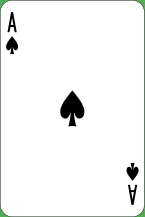

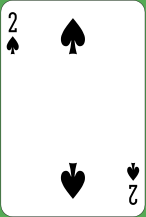

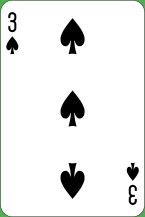

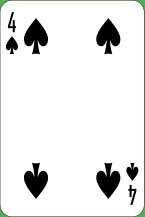

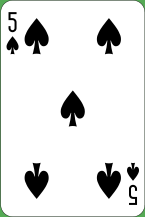

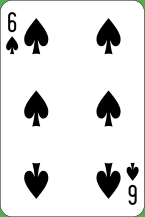

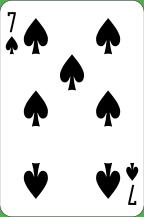

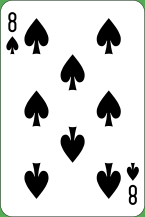

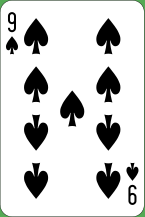

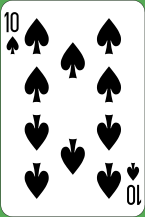

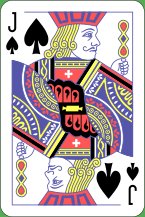

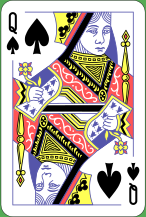

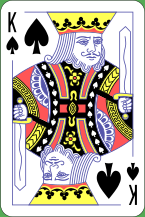

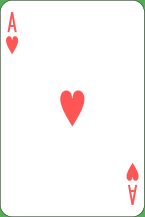

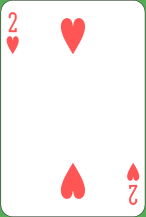

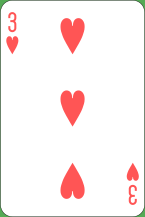

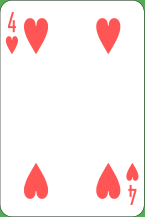

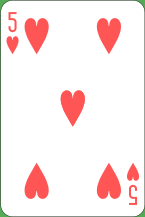

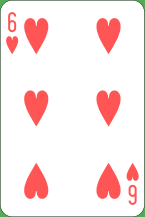

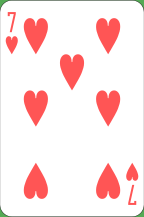

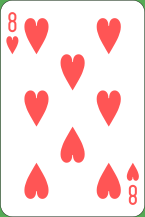

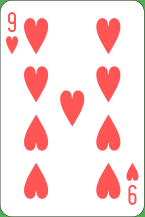

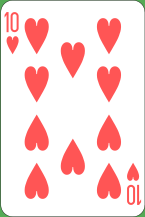

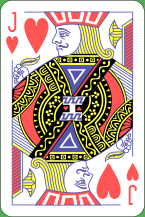

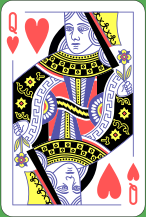

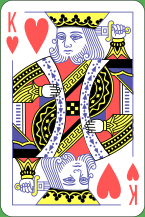

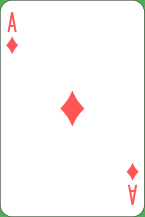

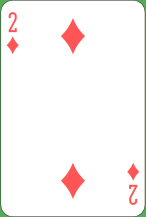

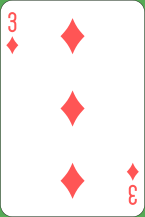

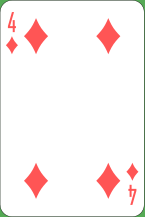

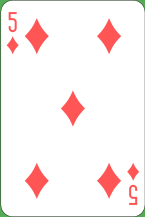

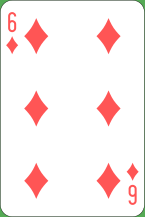

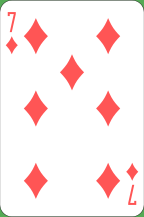

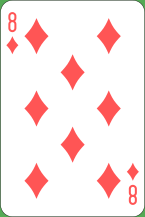

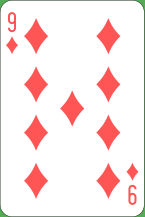

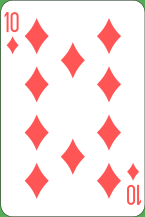

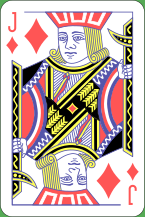

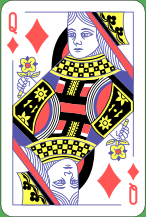

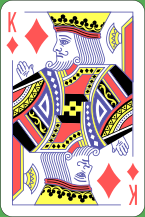

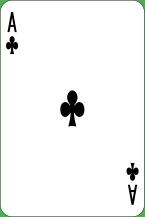

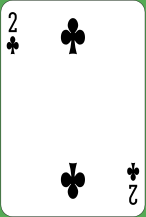

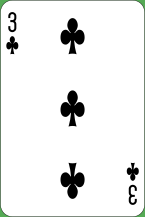

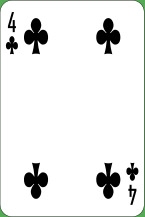

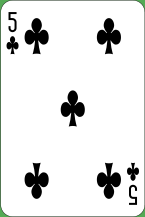

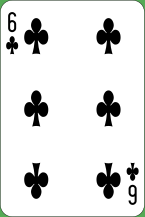

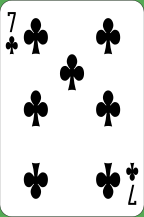

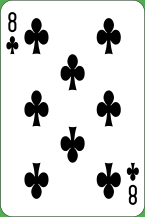

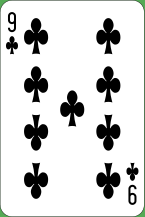

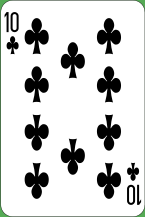

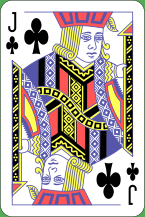

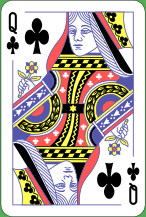

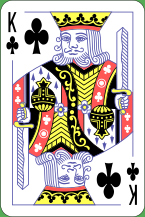

In [2]:
loop_through_images()

To use our deck easily, we might want to create a tuple with x, y position coordinates. Not going to type these manually, so let's automate this.

In [3]:
def create_coordinate_dictionary():
    suits = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
    cards = ['14', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
    y_dict = {'Spades' : 12, 'Hearts' : 241, 'Diamonds' : 470, 'Clubs' : 699}
    x_dict = {'14' : (12, 145), '2' : (168.5, 145), '3' : (325, 145), '4' : (481.5, 145.5),
              '5' : (638, 145), '6' : (795, 145), '7' : (951.5, 145), '8' : (1108, 145), 
              '9' : (1265, 145), '10' : (1421, 145), '11' : (1577.5, 145.5), '12' : (1734.5, 145), 
              '13' : (1891, 145)
             }
    card_coord_dictionary = {}
    for y in suits:
        y_pos = y_dict[y]
        for x in cards:
            x_pos = x_dict[str(x)]
            card_coord_dictionary[(x, y)] = (x_pos, y_pos)
    return card_coord_dictionary

In [4]:
card_coord_dictionary = create_coordinate_dictionary()
print(card_coord_dictionary)

{('14', 'Spades'): ((12, 145), 12), ('2', 'Spades'): ((168.5, 145), 12), ('3', 'Spades'): ((325, 145), 12), ('4', 'Spades'): ((481.5, 145.5), 12), ('5', 'Spades'): ((638, 145), 12), ('6', 'Spades'): ((795, 145), 12), ('7', 'Spades'): ((951.5, 145), 12), ('8', 'Spades'): ((1108, 145), 12), ('9', 'Spades'): ((1265, 145), 12), ('10', 'Spades'): ((1421, 145), 12), ('11', 'Spades'): ((1577.5, 145.5), 12), ('12', 'Spades'): ((1734.5, 145), 12), ('13', 'Spades'): ((1891, 145), 12), ('14', 'Hearts'): ((12, 145), 241), ('2', 'Hearts'): ((168.5, 145), 241), ('3', 'Hearts'): ((325, 145), 241), ('4', 'Hearts'): ((481.5, 145.5), 241), ('5', 'Hearts'): ((638, 145), 241), ('6', 'Hearts'): ((795, 145), 241), ('7', 'Hearts'): ((951.5, 145), 241), ('8', 'Hearts'): ((1108, 145), 241), ('9', 'Hearts'): ((1265, 145), 241), ('10', 'Hearts'): ((1421, 145), 241), ('11', 'Hearts'): ((1577.5, 145.5), 241), ('12', 'Hearts'): ((1734.5, 145), 241), ('13', 'Hearts'): ((1891, 145), 241), ('14', 'Diamonds'): ((12, 14

Let's draw a few cards, shall we?

### Drawing a few cards and try counting the running count

Let's start simple, just one deck.

In [5]:
DECK_PARAMETERS = {'number_of_decks' : 1, 'deck_lowest_card' : 2, 
                   'deck_highest_card' : 14, 'suits' : ['Spades', 'Hearts', 'Diamonds', 'Clubs'] }

In [6]:
## copied these functions, so you don't need to find and run in above code to use it here...
def create_deck():
    deck = list(itertools.product(range(DECK_PARAMETERS['number_of_decks']), 
                                  range(DECK_PARAMETERS['deck_lowest_card'], DECK_PARAMETERS['deck_highest_card']+1),
                                  DECK_PARAMETERS['suits']))
    return deck

def shuffle_deck(deck):
    random.shuffle(deck)
    return deck

# The Casino reshuffles about half way the deck, to deter card counters
def select_reshuffle_index(deck):
    # reshuffle is half way, so between 40 and 60 percent of deck we stick the reshuffle divider
    reshuffle_index = int(len(deck) * random.randint(40, 60) / 100)
    return reshuffle_index

# Create a new shoe to deal from
def get_new_shoe(deck):
    deck = shuffle_deck(deck)
    # Burn first card, index 0, start index 1...seriously, I think it's kind of stupid!!! Anyways.
    deck_index = 1
    reshuffle_index = select_reshuffle_index(deck)
    return deck, deck_index, reshuffle_index

In [7]:
# reuse our shoe creator, so we can mimic the casino later on.
deck = create_deck()
deck, deck_index, reshuffle_index = get_new_shoe(deck)
print(deck)

[(0, 9, 'Spades'), (0, 10, 'Clubs'), (0, 13, 'Clubs'), (0, 11, 'Diamonds'), (0, 8, 'Diamonds'), (0, 6, 'Diamonds'), (0, 5, 'Clubs'), (0, 9, 'Hearts'), (0, 7, 'Clubs'), (0, 6, 'Clubs'), (0, 13, 'Diamonds'), (0, 11, 'Hearts'), (0, 2, 'Hearts'), (0, 7, 'Diamonds'), (0, 9, 'Diamonds'), (0, 3, 'Diamonds'), (0, 7, 'Hearts'), (0, 4, 'Spades'), (0, 13, 'Spades'), (0, 14, 'Diamonds'), (0, 10, 'Hearts'), (0, 2, 'Clubs'), (0, 8, 'Hearts'), (0, 6, 'Spades'), (0, 14, 'Clubs'), (0, 12, 'Spades'), (0, 12, 'Hearts'), (0, 4, 'Diamonds'), (0, 12, 'Clubs'), (0, 10, 'Spades'), (0, 5, 'Diamonds'), (0, 3, 'Hearts'), (0, 4, 'Hearts'), (0, 8, 'Clubs'), (0, 2, 'Diamonds'), (0, 14, 'Spades'), (0, 3, 'Spades'), (0, 4, 'Clubs'), (0, 10, 'Diamonds'), (0, 8, 'Spades'), (0, 7, 'Spades'), (0, 2, 'Spades'), (0, 14, 'Hearts'), (0, 5, 'Spades'), (0, 5, 'Hearts'), (0, 9, 'Clubs'), (0, 11, 'Spades'), (0, 13, 'Hearts'), (0, 11, 'Clubs'), (0, 3, 'Clubs'), (0, 12, 'Diamonds'), (0, 6, 'Hearts')]


In [8]:
# first two indexes will be 0. cards:   2, 3, 4,   5, 6,   7, 8,    9, 10,  J,  Q,  K,  A
CARD_STRATEGY = {'Hi-Lo'     : [0, 0,   1, 1, 1,   1, 1,   0, 0,    0, -1, -1, -1, -1, -1],
                 'Hi-Opt I'  : [0, 0,   0, 1, 1,   1, 1,   0, 0,    0, -1, -1, -1, -1,  0],
                 'Hi-Opt II' : [0, 0,   1, 1, 2,   2, 1,   1, 0,    0, -2, -2, -2, -2,  0],
                 'KO'        : [0, 0,   1, 1, 1,   1, 1,   1, 0,    0, -1, -1, -1, -1, -1],
                 'Omega II'  : [0, 0,   1, 1, 2,   2, 2,   1, 0,   -1, -2, -2, -2, -2,  0],
                 'Red7'      : [0, 0,   1, 1, 1,   1, 1,   0, 0,    0, -1, -1, -1, -1, -1], # Red7 +1 for 7 is KO
                 'Halves'    : [0, 0, 0.5, 1, 1, 1.5, 1, 0.5, 0,  0.5, -1, -1, -1, -1, -1],
                 'Zen Count' : [0, 0,   1, 1, 2,   2, 2,   1, 0,    0, -2, -2, -2, -2, -1],
                 'Ten Count' : [0, 0,   1, 1, 1,   1, 1,   1, 1,    1, -2, -2, -2, -2,  1],
                 ''          : [0, 0,   0, 0, 0,   0, 0,   0, 0,    0,  0,  0,  0,  0,  0], # no counting strategy
                 'Max 8'     : [0, 0,   1, 1, 1,   1, 1,   1, 0,   -1, -1, -1, -1, -1, -1], # Max and his lucky number
                }

In [9]:
# load 'clear_output' so we don't need to scroll.
from IPython.display import clear_output

# show the card
def show_card(card):
    im = Image.open("2048px-English_pattern_playing_cards_deck.svg.png")
    y_length = 217
    card = (str(card[1]), card[2])
    try:
        card_coord = card_coord_dictionary[card]
        x_pos = card_coord[0][0]
        x_length = card_coord[0][1]
        y_pos = card_coord[1]
        crop_rectangle = (x_pos, y_pos, x_pos+x_length, y_pos+y_length)
        cropped_im = im.crop(crop_rectangle)
        display(cropped_im)
    except:
        print(f"card not found {card}")
    return cropped_im

# calculate the running count
def get_running_count(card, strategy, running_count):
    card_count_value = CARD_STRATEGY[strategy]
    running_count += card_count_value[card]
    return running_count

# draw a card and start counting, using input to move to next card
def train_own_pace_with_running_count(deck, strategy):
    running_count = 0
    for card in deck:
        clear_output(wait=True)
        show_card(card)
        running_count = get_running_count(card[1], strategy, running_count)
        print(f"RUNNING COUNT: {running_count}")
        user_input = input("Next Card (ENTER) / EXIT (SPACE, ENTER)")
        if user_input == ' ':
            break
    return

#### Training Counting at own pace, with running count

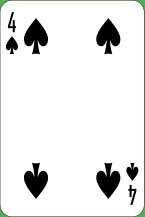

RUNNING COUNT: 1
Next Card (ENTER) / EXIT (SPACE, ENTER) 


In [10]:
strategy = 'Max 8'
deck, deck_index, reshuffle_index = get_new_shoe(deck)
train_own_pace_with_running_count(deck, strategy)

Nice. And are you ready to move to the next exercise?

#### Training Counting at set pace, without running count

In [17]:
# draw a card and start counting, get running count correct at set times
import time

def print_final_results(correct, total):
    print(f"You got {correct} correct from {total}.")
    if correct == total:
        print(f"Fantastic, try less seconds between cards, less checks, and larger deck.")
    elif correct/total >= .8:
        print(f"Well done, you are almost there! Try again.")
    else:
        print(f"Good try, keep practising, it's free, no pressure.")
    return 

def running_count_checkpoint(correct, running_count):
    motivational_words = ["you are fantastic", "that't great", "well done professor", 
                          "it comes natural", "you are on the team",
                          "you frighten the casino managers", "you're simply the best",
                         ]
    
    user_input = input("What is the running count, input a number (e.g. -2, 1)? ")
    print(f"RUNNING COUNT: {running_count}")
    if user_input == str(running_count):
        correct += 1
        mw_index = random.randint(0, len(motivational_words)-1)
        print(f"That's correct, {motivational_words[mw_index]}")
    else:
        print(f"Try again. You will get there!")
    return correct, user_input

def train_set_pace_without_running_count(deck, strategy, seconds, checkpoint):
    running_count = 0
    play = True
    deck_index = 0
    correct = 0
    total = 0
    while play:
        clear_output(wait=True)
        card = deck[deck_index]
        deck_index += 1
        if deck_index >= len(deck):
            play = False
        show_card(card)
        running_count = get_running_count(card[1], strategy, running_count)
        if (deck_index%checkpoint == 0 and deck_index > 0) or (not play):
            total += 1
            correct, user_input = running_count_checkpoint(correct, running_count)
            if user_input == ' ':
                break
        time.sleep(seconds)
    print_final_results(correct, total)
    return

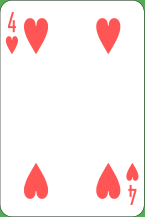

What is the running count, input a number (e.g. -2, 1)? 0
RUNNING COUNT: 0
That's correct, well done professor
You got 10 correct from 11.
Well done, you are almost there! Try again.


In [18]:
strategy = 'Max 8'
deck, deck_index, reshuffle_index = get_new_shoe(deck)
# Set the number of seconds between cards, even 0.5 seconds are possible
seconds = 2 # seconds waiting
# Set check point to see if you still have the running count correct
checkpoint = 5 # number of cards
train_set_pace_without_running_count(deck, strategy, seconds, checkpoint)

### Start Counting Casino Style!

In [87]:
import matplotlib.pyplot as plt
def get_image_of_card(card):
    im = Image.open("2048px-English_pattern_playing_cards_deck.svg.png")
    y_length = 217
    card = (str(card[1]), card[2])
    try:
        card_coord = card_coord_dictionary[card]
        x_pos = card_coord[0][0]
        x_length = card_coord[0][1]
        y_pos = card_coord[1]
        crop_rectangle = (x_pos, y_pos, x_pos+x_length, y_pos+y_length)
        cropped_im = im.crop(crop_rectangle)
    except:
        print(f"card not found {card}")
    return cropped_im

def place_card_on_table(card, card_position, fig):
    im = get_image_of_card(card)
    newax = fig.add_axes(card_position, anchor='N', zorder=0)
    newax.imshow(im)
    newax.axis('off')
    return

def set_background(fig):
    background_img = Image.open("blackjack_table.jpg")
    ax = fig.add_axes([0, 0, 1.5, 1.5], zorder=0)
    # show the background image
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    #ax.imshow(background_img, extent=[x0, x1, y0, y1], aspect='auto')
    ax.imshow(background_img, extent=[0, 1200, 0, 800])
    ax.axis('off')
    
    return

def layout_all_cards(entity, card, i, fig):
    card_size_x = .2
    card_size_y = .4
    #dealer_x_start = .51 
    #dealer_y_start = 1
    #dealer_offset_x = .2
    #dealer_offset_y = 0
    card_size = [.2, .4]
    if entity == 'dealer':
        position = [.51, 1]
        offset = [.2, 0]
    else: # player
    # player positions
    #player_x_start = 0.650
    #player_y_start = 0.1
    #player_x_offset = -.05
    #player_y_offset = .1
        position = [.65, .1]
        offset = [-.05, .1]
    card_position = [position[0]+(offset[0] * i), 
                     position[1]+(offset[1] * i), 
                     card_size[0], card_size[1]
                    ]
    place_card_on_table(card, card_position, fig)
    return

def layout_cards(deck, deck_index, fig, play):
    # layout standard game    
    cards = []
    for i in range(2):
        if deck_index >= len(deck):
            play = False
            continue
        card = deck[deck_index]
        cards.append(card)
        deck_index += 1
        entity = 'player'
        layout_all_cards(entity, card, i, fig)
               
        if deck_index >= len(deck):
            play = False
            continue
        card = deck[deck_index]
        cards.append(card)
        deck_index += 1
        entity = 'dealer'
        layout_all_cards(entity, card, i, fig)
        
        if deck_index >= len(deck):
            play = False
            continue
    return cards, deck_index, play

def train_one_player_casino_style(deck, strategy): 
    deck_index = 0
    play = True
    running_count = 0
    correct = 0
    total = 0
    while play:
        clear_output(wait=True)
        fig, ax = plt.subplots()
        plt.axis('off')
        
        # Set Background
        set_background(fig)
        # Layout Cards
        cards, deck_index, play = layout_cards(deck, deck_index, fig, play)
        plt.show()
        for card in cards:
            running_count = get_running_count(card[1], strategy, running_count)
            
        # Check Running Count
        
        correct, user_input = running_count_checkpoint(correct, running_count)
        total += 1
        if user_input == ' ':
            break
        
        time.sleep(seconds)
        
    print_final_results(correct, total)     

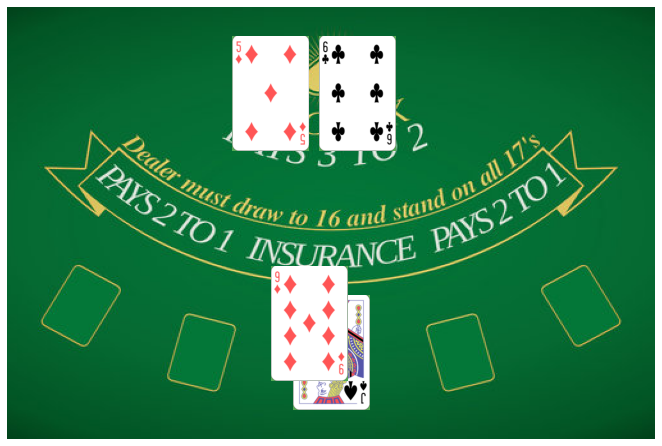

What is the running count, input a number (e.g. -2, 1)? 0
RUNNING COUNT: 0
That's correct, that't great
You got 12 correct from 13.
Well done, you are almost there! Try again.


In [88]:
strategy = 'Max 8'
deck, deck_index, reshuffle_index = get_new_shoe(deck)
seconds = 2 # seconds waiting
checkpoint = 5 # number of cards
train_one_player_casino_style(deck, strategy)

## Final Thoughts

Well, it's clear that it is possible to win money with card counting. It's not even illegal in every state in the US. I'm not an expert on this, so I will not take any liability for your actions, if you choose to pursue a career in card counting.

Anyways.